# Pràctica 9: Reinforcement learning

#### NOM: Gerard Santacatalina Rubio
#### NIU: 1534002

## Avaluació i entregues

### Entregues
Les pràctiques es realitzarán els divendres de 15:00 a 17:00. Cada setmana presentarem nous mètodes i algorismes vistos a la classe de teoria.

Es pujará un .ipynb ja executat, **sense ZIP**, on no només hi hagi codi sinó també text explicatiu de gràfiques, resultats, i analisis. Tingueu en compte que no es valora tant la quantitat, sino la qualitat del que s'hi explica. Hem d'aprendre a extreure el gra de la palla i presentar-ho de forma correcta i concisa.


### Avaluació
Aquesta pràctica tractará els següents temes:

* A. [Multi-armed-bandits](#A.-Multi-Armed-Bandits) **(50%)**
* B. [OpenAI Gym](#OpenAI-Gym) **(50%)**


## Introducció

En aquesta pràctica serà diferent a les anteriors. Com que no teniu massa temps, hem decidit que no haureu d'implementar algorismes, sinò entendre els conceptes bàsics i explicar-los.

Per aquest motiu, farem ús de 2 entorns que ens ajudin a entendre com funciona un algorisme d'aprenentatge per reforç (Reinforcement Learning).


<img src="https://upload.wikimedia.org/wikipedia/commons/9/95/Markov_diagram_v1.svg" width="80%">



# A. Multi-Armed Bandits




## Multi-Armed Bandits and Reinforcement Learning

### A Gentle Introduction to the Classic Problem with Python Examples

Aplicacions de MAB: [link](https://arxiv.org/abs/1904.10040). Post extret de la següent web: [link](https://towardsdatascience.com/multi-armed-bandits-and-reinforcement-learning-dc9001dcb8da)

![Photo by [Carl Raw](https://unsplash.com/@carltraw?utm_source=medium&utm_medium=referral) on [Unsplash](https://unsplash.com?utm_source=medium&utm_medium=referral)](https://cdn-images-1.medium.com/max/10238/0*2orlZg7aPX5dhdBF)

Multi-armed bandit problems are some of **the simplest** reinforcement learning (RL) problems to solve. We have an agent which we allow to choose actions, and each action has a reward that is returned according to a given, underlying probability distribution. The game is played over many episodes (single actions in this case) and the goal is to maximize your reward.

**An easy picture is to think of choosing between *k*-many [*one-armed bandits*](https://en.wikipedia.org/wiki/Slot_machine) (i.e. slot machines) or one big slot machine with *k* arms. Each arm you pull has a different reward associated with it. You’re given 1,000 quarters, so you need to develop some kind of strategy to get the most bang for your buck.**

One way to approach this is to select each one in turn and keep track of how much you received, then keep going back to the one that paid out the most. This is possible, but, as stated before, each bandit has an underlying probability distribution associated with it, meaning that you may need more samples before finding the right one. But, each pull you spend trying to figure out the best bandit to play takes you away from maximizing your reward. This basic balancing act is known as the **explore-exploit dilemma**. Forms of this basic problem come up in areas outside of AI and RL, such as in [choosing a career](https://joshkaufman.net/explore-exploit/), [finance](https://www.aaai.org/ocs/index.php/IJCAI/IJCAI15/paper/viewFile/10972/10798), [human psychology](https://econ.arizona.edu/sites/econ/files/wilsonetal_jepgeneral2014_print.pdf), and even [medical ethics](http://www.pnas.org/content/106/52/22387) (although, I think my favorite proposed use case relates to the suggestion that, due to its richness, it be given to Nazi Germany during WWII, [“as the ultimate form of intellectual sabotage.”](https://people.eecs.berkeley.edu/~russell/classes/cs294/s11/readings/Gittins:1979.pdf)).



## TL;DR

We introduce multi-armed bandit problems following the framework of [Sutton and Barto’s book](https://amzn.to/2Q2mxxn) (affiliate link of the author of the post) and develop a framework for solving these problems as well as examples. 

We’ll focus on:
* [**ϵ−greedy**](#%CF%B5-Greedy-Methods)
* [**ϵ−decay**](#%CF%B5-Decay-Strategies)
* [**optimistic strategies**](#Optimistic-Initial-Value)



## Problem Setup

To get started, let’s describe the problem in a bit more technical detail. What we wish to do, is develop an estimate $Qt(a)$:

![](https://cdn-images-1.medium.com/max/2000/1*n6jigGk161weIu8xHYQT_A.png)

Where $Qt(a)$ is the estimated, expected reward ($Rn$), when action $An$ is taken at step $n$. 

We’re going to iteratively build a model that will converge towards the true value of each action. We’re going to use a Gaussian (normal) distribution for all of the underlying probability distributions that we’ll explore so that the mean corresponds to the true value (after all, given enough samples, we would expect our rewards to converge to the mean of the selected action).

The **simplest way to proceed** is to take the **greedy action** or take the action we think will maximize our reward at each time step. Another way of writing this is:

![](https://cdn-images-1.medium.com/max/2000/1*S3nJWVy8oQE0gTDnh2D0jw.png)

We can denote this maximum expectation or greedy action as $A^*n$. This is the *exploit* side of our aforementioned **explore-exploit dilemma**, and it makes lots of sense if the goal is to maximize our reward. Of course, doing this repeatedly only works well once we have a good sense of our expected rewards for each actions (unless we get rather lucky). So, we need to figure out an algorithm that explores enough of our search space so that we can exploit the best actions.

Before jumping into this, there’s one last concept to introduce. In typical RL applications, we may need hundreds of thousands of iterations, if not millions or more. It quickly becomes very computationally intensive to run simulations of these sorts and keep track of all that data just to calculate the average reward. To avoid this, we can use a handy formula so that all we need to track are two values: the mean and number of steps taken. If we need to calculate the mean at step $n$, $m_n$, we can do it with the previous mean, $m_{n−1}$ and $n$ as follows:

![](https://cdn-images-1.medium.com/max/2000/1*IGzEQ2Ze5N6ijgApE-Tynw.png)

With that, we can start to develop strategies for solving our *k-bandit* problems.



## ϵ-Greedy Methods

We briefly talked about a pure-greedy method, and I indicated that on its own it won’t work very well. Consider if you implement a pure-greedy method, you take one action, $A_n=a_1$, at $n=1$ and get a reward. Well, then this becomes your highest reward (assuming it is positive) and you simply repeat $a_1 ​∀ n$ (take action $a_1$ for all steps $n$). 

To encourage a bit of exploration, we can use ϵ-greedy which means that we explore another option with a probability of ϵ. This provides a bit of noise into the algorithm to ensure you keep trying other values, otherwise, you keep on exploiting your maximum reward.

Let’s turn to Python to implement our *k-*armed bandit.



## Building a greedy k-Armed Bandit

We’re going to define a class called `eps_bandit` to be able to run our experiment. This class takes number of arms, `k`, epsilon value `eps`, number of iterations `iter` as inputs. We'll also define a term `mu` that we can use to adjust the average rewards of each of the arms.


In [118]:
# import modules
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tqdm

%matplotlib inline
L_dfs_eps = []
L_dfs_iters = []

In [6]:
# global parameters
k = 10           # number of bandits
iters = 1000     # iters (steps or pulls) inside an episode
episodes = 1000  # number of episodes

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tqdm

class eps_bandit:
    '''
    epsilon-greedy k-bandit problem

    Inputs
    =====================================================
    k: number of arms (int)
    eps: probability of random action 0 < eps < 1 (float)
    iters: number of steps (int)
    mu: set the average rewards for each of the k-arms.
        Set to "random" for the rewards to be selected from a normal distribution with mean = 0.
        Set to "sequence" for the means to be ordered from 0 to k-1.
        Pass a list or array of length = k for user-defined values.
    '''

    def __init__(self, k, eps, iters, mu='random'):
        # Number of arms
        self.k = k
        # Search probability
        self.eps = eps
        # Number of iterations
        self.iters = iters
        
        self.reset()

        if type(mu) == list or type(mu).__module__ == np.__name__:
            # User-defined averages
            self.mu = np.array(mu)
        elif mu == 'random':
            # Draw means from probability distribution
            self.mu = np.random.normal(0, 1, k)
        elif mu == 'sequence':
            # Increase the mean for each arm by one
            self.mu = np.linspace(0, k-1, k)

    def reset(self):
        # Resets results while keeping settings

        # Step count
        self.n = 0
        # Step count for each arm
        self.k_n = np.zeros(k)
        # Total mean reward
        self.mean_reward = 0
        self.reward = np.zeros(iters) #for plotting purposes
        # Mean reward for each arm
        self.k_reward = np.zeros(k)

    def pull(self):
        # Generate random number
        p = np.random.rand()
        if self.eps == 0 and self.n == 0:
            a = np.random.choice(self.k)
        elif p < self.eps:
            # Randomly select an action
            a = np.random.choice(self.k)
        else:
            # Take greedy action
            a = np.argmax(self.k_reward)

        reward = np.random.normal(self.mu[a], 1)

        # Update counts
        self.n += 1
        self.k_n[a] += 1

        # Update total
        self.mean_reward = self.mean_reward + (reward - self.mean_reward) / self.n

        # Update results for a_k
        self.k_reward[a] = self.k_reward[a] + (reward - self.k_reward[a]) / self.k_n[a]

    def run(self):
        for i in range(self.iters):
            self.pull()
            self.reward[i] = self.mean_reward

There are plenty of different ways to define this class. I did it so that once we initialize our problem, we just call the run() method and can examine the outputs. By default, the average rewards for each arm are drawn from a normal distribution around 0. Setting mu="sequence" will cause the rewards to range from 0 to *k-1* to make it easy to know which actions provide the best rewards when evaluating the results and which actions were taken. Finally, you could also set your own average rewards by passing values to mu.

Let’s set up some comparisons using different values of ϵ\epsilonϵ. For each of these, we’ll set k=10, run 1,000 steps for each episode and run 500 episodes. After each episode, we will reset the bandits and copy the averages across the different bandits to keep things consistent.

100%|██████████| 1000/1000 [00:15<00:00, 65.48it/s]


<function matplotlib.pyplot.show(close=None, block=None)>

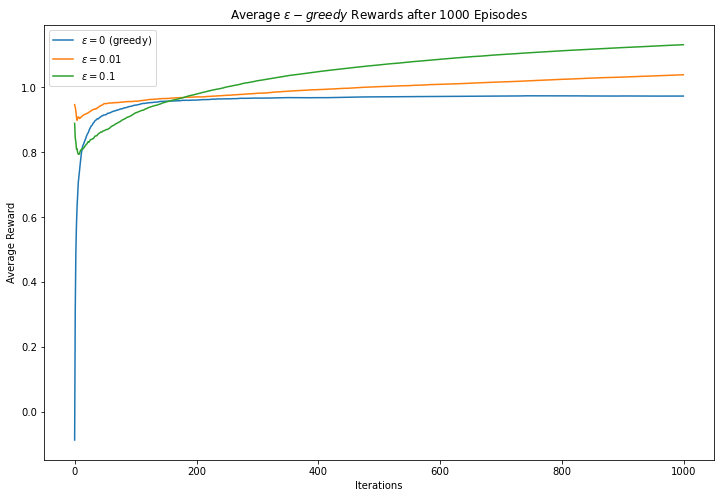

In [8]:

eps_000_rewards = np.zeros(iters)
eps_001_rewards = np.zeros(iters)
eps_010_rewards = np.zeros(iters)

#init bandits behaviour
behaviour = eps_bandit(k, 0.00, iters).mu.copy()

# Run experiments
for i in tqdm.tqdm(range(episodes)):
    # Initialize bandits
    eps_000 = eps_bandit(k, 0.00, iters, behaviour)
    eps_001 = eps_bandit(k, 0.01, iters, eps_000.mu.copy())
    eps_010 = eps_bandit(k, 0.1, iters, eps_000.mu.copy())

    # Run experiments
    eps_000.run()
    eps_001.run()
    eps_010.run()

    # Update long-term averages
    eps_000_rewards = eps_000_rewards + (eps_000.reward - eps_000_rewards) / (i + 1)
    eps_001_rewards = eps_001_rewards + (eps_001.reward - eps_001_rewards) / (i + 1)
    eps_010_rewards = eps_010_rewards + (eps_010.reward - eps_010_rewards) / (i + 1)

plt.figure(figsize=(12,8))
plt.plot(eps_000_rewards, label="$\epsilon=0$ (greedy)")
plt.plot(eps_001_rewards, label="$\epsilon=0.01$")
plt.plot(eps_010_rewards, label="$\epsilon=0.1$")
plt.legend()
plt.xlabel("Iterations")
plt.ylabel("Average Reward")
plt.title("Average $\epsilon-greedy$ Rewards after " + str(episodes)  + " Episodes")
plt.show


Looking at the results, the greedy function under performs the other two consistently, with ϵ=0.01 coming in between the two and ϵ=0.1 performing the best of the three here. Below, we can see the effect is clearer using the sequence argument, and can get a feel for how often the optimal action is taken per episode because the averages remain consistent across episodes.

100%|██████████| 1000/1000 [00:15<00:00, 65.70it/s]


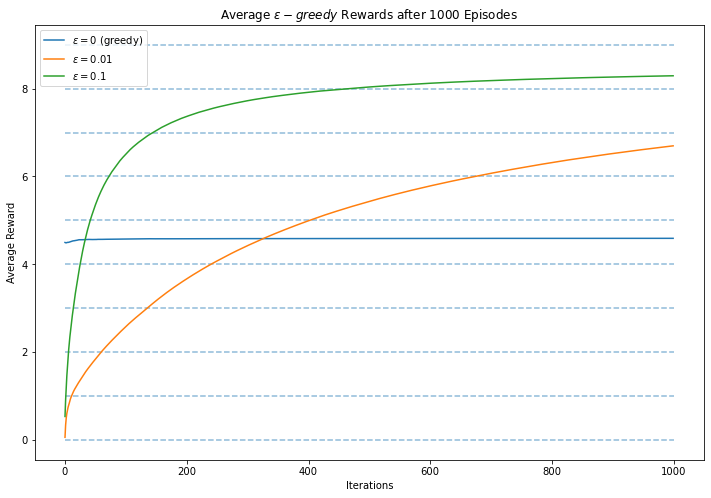

In [9]:

eps_0_rewards = np.zeros(iters)
eps_01_rewards = np.zeros(iters)
eps_1_rewards = np.zeros(iters)
eps_0_selection = np.zeros(k)
eps_01_selection = np.zeros(k)
eps_1_selection = np.zeros(k)

# Run experiments
for i in tqdm.tqdm(range(episodes)):
    # Initialize bandits
    eps_0 = eps_bandit(k, 0, iters, mu='sequence')
    eps_01 = eps_bandit(k, 0.01, iters, eps_0.mu.copy())
    eps_1 = eps_bandit(k, 0.1, iters, eps_0.mu.copy())

    # Run experiments
    eps_0.run()
    eps_01.run()
    eps_1.run()

    # Update long-term averages
    eps_0_rewards = eps_0_rewards + (eps_0.reward - eps_0_rewards) / (i + 1)
    eps_01_rewards = eps_01_rewards + (eps_01.reward - eps_01_rewards) / (i + 1)
    eps_1_rewards = eps_1_rewards + (eps_1.reward - eps_1_rewards) / (i + 1)

    # Average actions per episode
    eps_0_selection = eps_0_selection + (eps_0.k_n - eps_0_selection) / (i + 1)
    eps_01_selection = eps_01_selection + (eps_01.k_n - eps_01_selection) / (i + 1)
    eps_1_selection = eps_1_selection + (eps_1.k_n - eps_1_selection) / (i + 1)

plt.figure(figsize=(12,8))
plt.plot(eps_0_rewards, label="$\epsilon=0$ (greedy)")
plt.plot(eps_01_rewards, label="$\epsilon=0.01$")
plt.plot(eps_1_rewards, label="$\epsilon=0.1$")
for i in range(k):
    plt.hlines(eps_0.mu[i], xmin=0,
              xmax=iters, alpha=0.5,
              linestyle="--")
plt.legend()
plt.xlabel("Iterations")
plt.ylabel("Average Reward")
plt.title(f"Average $\epsilon-greedy$ Rewards after {episodes} Episodes")
plt.show()

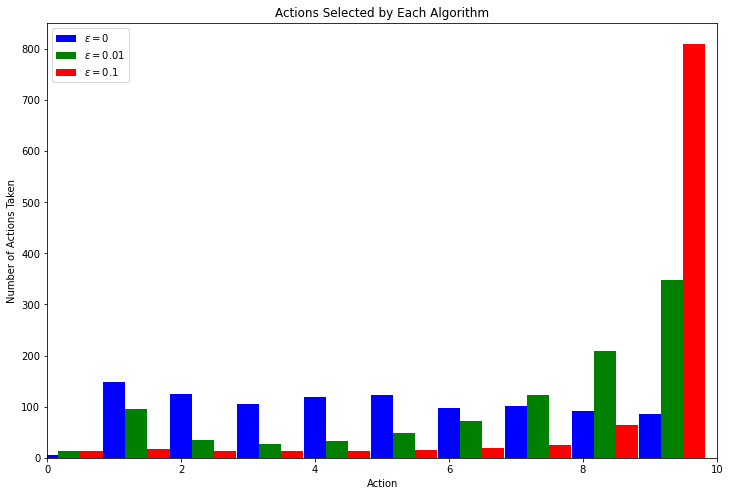

Percentage of actions selected:


,a = 0,a = 1,a = 2,a = 3,a = 4,a = 5,a = 6,a = 7,a = 8,a = 9
$\epsilon=0$,0.6209,14.8877,12.3920,10.4994,11.8000,12.2000,9.8000,10.1000,9.2000,8.5000
$\epsilon=0.01$,1.3301,9.5606,3.5001,2.6036,3.1963,4.7602,7.1095,12.2884,20.9062,34.7450
$\epsilon=0.1$,1.3132,1.6826,1.2650,1.2344,1.3154,1.4748,1.8277,2.4844,6.3583,81.0442


In [10]:
  
bins = np.linspace(0, k-1, k)

plt.figure(figsize=(12,8))
plt.bar(bins, eps_0_selection, width = 0.33, color='b', label="$\epsilon=0$")
plt.bar(bins+0.33, eps_01_selection, width=0.33, color='g', label="$\epsilon=0.01$")
plt.bar(bins+0.66, eps_1_selection, width=0.33, color='r', label="$\epsilon=0.1$")
plt.legend()
plt.xlim([0,k])
plt.title("Actions Selected by Each Algorithm")
plt.xlabel("Action")
plt.ylabel("Number of Actions Taken")
plt.show()

opt_per = np.array([eps_0_selection, eps_01_selection, eps_1_selection]) / iters * 100
df = pd.DataFrame(opt_per, index=['$\epsilon=0$', '$\epsilon=0.01$', '$\epsilon=0.1$'],
                      columns=["a = " + str(x) for x in range(0, k)])
print("Percentage of actions selected:")
display(df)


Viewing the average selection of the algorithms, we see why the larger ϵ value performs well, it takes the optimal selection 80% of the time.

Play around with the different values of both ϵ and *k* to see how these results change. For example, decreasing the search space would likely benefit smaller values of ϵ as exploration would be less beneficial and vice versa. Additionally, increasing the number of iterations will begin to benefit the lower value of ϵ because it will have less random noise.

## ϵ-Decay Strategies

The ϵ-greedy strategies have an obvious weakness in that they continue to include random noise no matter how many examples they see. It would be better for these to settle on an optimal solution and continue to exploit it. To this end, we can introduce ϵ-decay which reduces the probability of exploration with every step. This works by defining ϵ as a function of the number of steps, *n*.

![](https://cdn-images-1.medium.com/max/2000/1*OHcZPVCqG3dqIVFtpv7B-Q.png)

Where β<1 is introduced as a scaling factor to reduce the scaling rate so that the algorithm has sufficient opportunity to explore. In this case, we also include +1 in the denominator to prevent infinities from appearing. Given this, we can make a few small changes to our previous class of bandits to define an eps_decay_bandit class that works on the same principles.

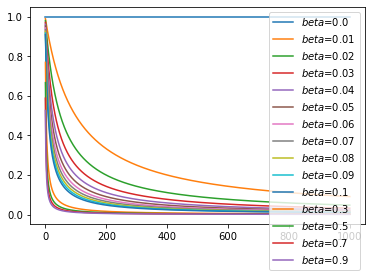

In [11]:
x=np.linspace(1, 1000, 1000)
for b in np.arange(10)/100:
    plt.plot(1/(1+x*b),label=f'$beta$={b}')
for b in np.arange(1,11,2)/10:
    plt.plot(1/(1+x*b),label=f'$beta$={b}')
plt.legend()
plt.show()

In [12]:
class eps_decay_bandit:
    '''
    epsilon-decay k-bandit problem

    Inputs
    =====================================================
    k: number of arms (int)
    iters: number of steps (int)
    mu: set the average rewards for each of the k-arms.
        Set to "random" for the rewards to be selected from a normal distribution with mean = 0.
        Set to "sequence" for the means to be ordered from 0 to k-1.
        Pass a list or array of length = k for user-defined values.
    '''

    def __init__(self, k, iters, mu='random'):
        # Number of arms
        self.k = k
        # Number of iterations
        self.iters = iters

        self.reset()
        
        if type(mu) == list or type(mu).__module__ == np.__name__:
            # User-defined averages
            self.mu = np.array(mu)
        elif mu == 'random':
            # Draw means from probability distribution
            self.mu = np.random.normal(0, 1, k)
        elif mu == 'sequence':
            # Increase the mean for each arm by one
            self.mu = np.linspace(0, k-1, k)

    def reset(self):
        # Resets results while keeping settings

        # Step count
        self.n = 0
        # Step count for each arm
        self.k_n = np.zeros(k)
        # Total mean reward
        self.mean_reward = 0
        self.reward = np.zeros(iters) #for plotting purposes
        # Mean reward for each arm
        self.k_reward = np.zeros(k)

    def pull(self):
        # Generate random number
        p = np.random.rand()
        if p < 1 / (1 + self.n / self.k):
            # Randomly select an action
            a = np.random.choice(self.k)
        else:
            # Take greedy action
            a = np.argmax(self.k_reward)

        reward = np.random.normal(self.mu[a], 1)

        # Update counts
        self.n += 1
        self.k_n[a] += 1

        # Update total
        self.mean_reward = self.mean_reward + (reward - self.mean_reward) / self.n

        # Update results for a_k
        self.k_reward[a] = self.k_reward[a] + (reward - self.k_reward[a]) / self.k_n[a]

    def run(self):
        for i in range(self.iters):
            self.pull()
            self.reward[i] = self.mean_reward

Now running the code:

100%|██████████| 1000/1000 [00:10<00:00, 91.48it/s]


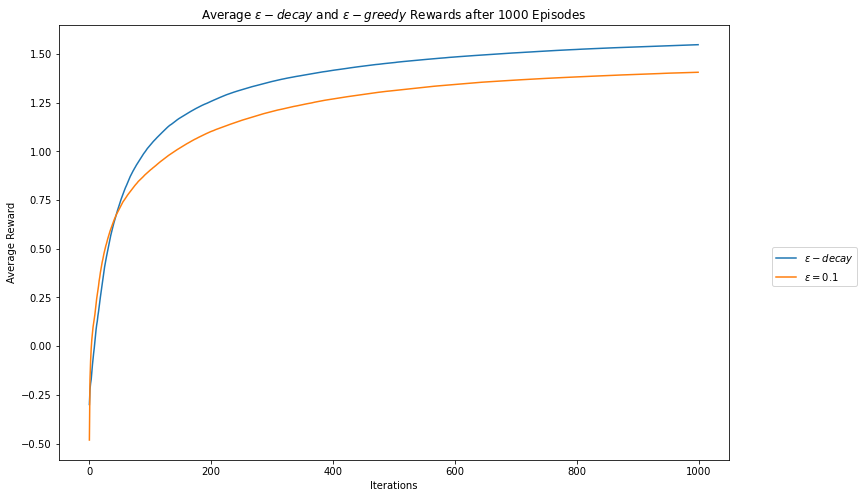

In [13]:
eps_decay_rewards = np.zeros(iters)
eps_1_rewards = np.zeros(iters)

#init bandits behaviour
behaviour = eps_decay_bandit(k, iters).mu.copy()

# Run experiments
for i in tqdm.tqdm(range(episodes)):
    # Initialize bandits
    eps_decay = eps_decay_bandit(k, iters, behaviour)
    eps_1 = eps_bandit(k, 0.1, iters, eps_decay.mu.copy())

    # Run experiments
    eps_decay.run()
    eps_1.run()

    # Update long-term averages
    eps_decay_rewards = eps_decay_rewards + (eps_decay.reward - eps_decay_rewards) / (i + 1)
    eps_1_rewards = eps_1_rewards + (eps_1.reward - eps_1_rewards) / (i + 1)

plt.figure(figsize=(12,8))
plt.plot(eps_decay_rewards, label="$\epsilon-decay$")
plt.plot(eps_1_rewards, label="$\epsilon=0.1$")
plt.legend(bbox_to_anchor=(1.2, 0.5))
plt.xlabel("Iterations")
plt.ylabel("Average Reward")
plt.title("Average $\epsilon-decay$ and " + "$\epsilon-greedy$ Rewards after " + str(episodes) + " Episodes")
plt.show()

The ϵ-decay strategy outperforms our previous best algorithm as it sticks to the optimal action once it is found.

There’s one last method to balance the explore-exploit dilemma in *k-bandit* problems, **optimistic initial values**.

## Optimistic Initial Value

This approach differs significantly from the previous examples we explored because it does not introduce random noise to find the best action, *A*_n*​. Instead, we over estimate the rewards of all the actions and continuously select the maximum. In this case, the algorithm explores early on as it seeks to maximize its returns while additional information allows the values to converge to their true means. This approach does require some additional background knowledge to be included in the set up because we need at least some idea of what the rewards are so that we can over estimate them.

For this implementation, we don’t need a new class. Instead, we can simply use our eps_bandit class and set ϵ=0 and provide high, initial values for the estimates. Also, I like to initialize the pull count for each arm as 1 instead of 0 to encourage slightly slower convergence and ensure good exploration.

100%|██████████| 1000/1000 [00:15<00:00, 63.67it/s]


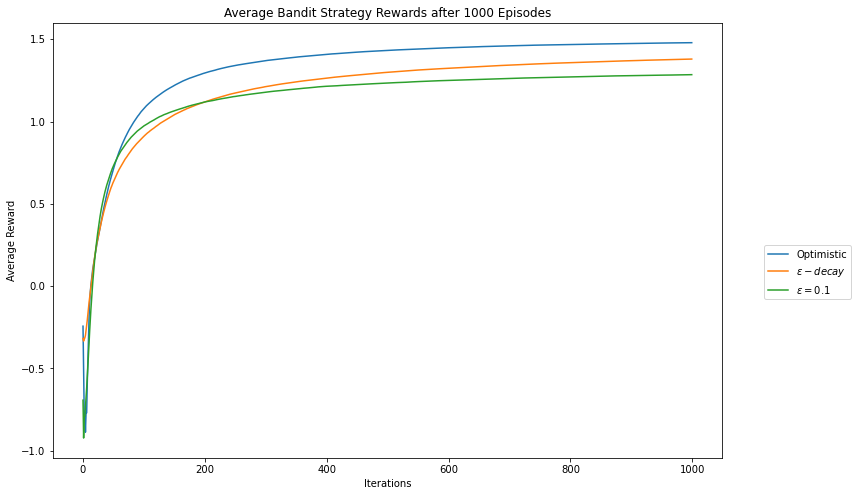

In [14]:
oiv_rewards = np.zeros(iters)
eps_decay_rewards = np.zeros(iters)
eps_1_rewards = np.zeros(iters)

# Select initial values
oiv_init = 5.

#init bandits behaviour
behaviour = eps_bandit(k, 0, iters).mu.copy()

# Run experiments

for i in tqdm.tqdm(range(episodes)):
    # Initialize bandits
    oiv_bandit = eps_bandit(k, 0, iters, behaviour)
    oiv_bandit.k_reward += oiv_init
    oiv_bandit.k_n += 1 #np.ones(k)
    eps_decay = eps_decay_bandit(k, iters, oiv_bandit.mu.copy())
    eps_1 = eps_bandit(k, 0.1, iters, oiv_bandit.mu.copy())

    # Run experiments
    oiv_bandit.run()
    eps_decay.run()
    eps_1.run()

    # Update long-term averages
    oiv_rewards = oiv_rewards + (oiv_bandit.reward - oiv_rewards) / (i + 1)
    eps_decay_rewards = eps_decay_rewards + (eps_decay.reward - eps_decay_rewards) / (i + 1)
    eps_1_rewards = eps_1_rewards + (eps_1.reward - eps_1_rewards) / (i + 1)

plt.figure(figsize=(12,8))
plt.plot(oiv_rewards, label="Optimistic")
plt.plot(eps_decay_rewards, label="$\epsilon-decay$")
plt.plot(eps_1_rewards, label="$\epsilon=0.1$")
plt.legend(bbox_to_anchor=(1.2, 0.5))
plt.xlabel("Iterations")
plt.ylabel("Average Reward")
plt.title("Average Bandit Strategy Rewards after " + str(episodes) + " Episodes")
plt.show()

We can see that, in this case, the optimistic initial value approach outperformed both our ϵ−greedy and the ϵ−decay algorithms. We can see too, the estimates the algorithm has for each of arms in the last episode.

In [25]:
df = pd.DataFrame({"number of selections": oiv_bandit.k_n - 1,
                  "actual reward": oiv_bandit.mu,
                  "estimated reward": oiv_bandit.k_reward})
df = df.applymap(lambda x: np.round(x, 2))
df['number of selections'] = df['number of selections'].astype('int')
df

,number of selections,actual reward,estimated reward
0,2,-1.25,1.43
1,2,-1.39,0.97
2,1,-0.83,1.70
3,2,-0.23,1.21
4,4,0.60,1.69
5,2,0.31,1.02
6,4,1.04,1.85
7,968,2.07,2.08
8,3,0.37,1.80
9,12,1.42,1.92


The estimates are far off the actual rewards in all cases except the one with more than 900 pulls. This highlights a lot of what we’ll be doing in reinforcement learning more generally. We don’t necessarily care about acquiring accurate representations of the environment we are interacting with. Instead, we intend to **learn optimal behavior** in those situations and seek to behave accordingly. This can open up a whole discussion about model-free versus model-based learning that we’ll have to postpone for another time.

There are [other bandit methods](https://www.datahubbs.com/multi-armed-bandits-reinforcement-learning-2/) that we will explore such as the gradient bandits, upper confidence bound (UCB) methods, and nonstationary problems. Plus, many others like [dueling bandits](http://www.sciencedirect.com/science/article/pii/S0022000012000281?via%3Dihub), [cluster bandits](https://arxiv.org/abs/1401.8257), [collaborative filtering bandits](https://arxiv.org/abs/1502.03473), [spatially correlated bandits](http://www.biorxiv.org/content/biorxiv/early/2017/04/28/106286.full.pdf), [distributed bandtis](https://arxiv.org/abs/1604.07706), [adversarial bandits](http://mercurio.srv.dsi.unimi.it/~cesabian/Pubblicazioni/J18.pdf), and [contextual bandits](http://proceedings.mlr.press/v32/agarwalb14.pdf) which are open to exploration. Starting to wonder if we haven’t been hit with [intellectual sabotage…](https://mlwave.com/multi-armed-bandits-algorithms-made-easy/)


#### Preguntes

**1.** Executa el ϵ-greedy `eps_bandit` amb els mateixos valors de eps (0, 0.01, 0.1) amb diferents valors de `episodes`. Desde 1 fins a 1000. Explica el comportament què hi veus

**2.** Què passa amb el número de iteracions dins d'un episodi? Mostra què passa en aquest cas per valors petits (<100) i per valors més grans (>500)

**3.** Com associes les diferents parts del `eps_bandit` amb un problema de Reinforcement Learning. Explica amb què relaciones la `POLICY`, `ENVIRONMENT`, `OBSERVATION`, `REWARD` i `ACTION`. 

**4.** Creus que la greedy action del `pull` esta ben implementada? És igual de just per tots els braços de la màquina? Heu observat alguna desviació en els random? Com ho faries més just?

**5.** Què significa un valor de `eps` de 0? I si li posem un 1? Què passarà?

**6.** Què ha cambiat de codi entre `eps_bandit` i `eps_decay_bandit`?

**7.** Quin valor de $\beta$ a han escollit al codi de `eps_decay_bandit`? Mostra la gràfica que ensenyi el valor de decay pels 1000 primers steps.

**8.** Explica amb les teves paraules la gràfica de la comparativa entre `eps_bandit`, `eps_decay_bandit` i `optimistic`. Posa ènfasis en el comportament inicial dels 3 i en el comportament final després de 1.000 iteracions.

#### Preguntes

**1.** Executa el ϵ-greedy `eps_bandit` amb els mateixos valors de eps (0, 0.01, 0.1) amb diferents valors de `episodes`. Desde 1 fins a 1000. Explica el comportament què hi veus

In [160]:
for i,j in zip(L_dfs_eps,[25,50,100,250,500,750,1000]):
    print("Taula del comportament dels valors epsilon amb "+str(j)+" episodis:")
    display(i)
    print("\n")

Taula del comportament dels valors epsilon amb 25 episodis:


,a = 0,a = 1,a = 2,a = 3,a = 4,a = 5,a = 6,a = 7,a = 8,a = 9
$\epsilon=0$,0.364,19.708,15.928,8.000,20.000,4.000,4.000,4.000,8.000,16.000
$\epsilon=0.01$,0.500,12.896,2.308,1.992,4.132,5.848,5.804,12.204,19.140,35.176
$\epsilon=0.1$,1.400,1.428,1.352,1.248,1.084,1.800,1.900,2.344,10.364,77.080




Taula del comportament dels valors epsilon amb 50 episodis:


,a = 0,a = 1,a = 2,a = 3,a = 4,a = 5,a = 6,a = 7,a = 8,a = 9
$\epsilon=0$,0.034,21.970,11.996,20.000,6.000,2.000,10.000,14.000,6.000,8.000
$\epsilon=0.01$,1.412,10.126,4.396,3.390,3.062,5.218,8.136,9.950,19.532,34.778
$\epsilon=0.1$,1.178,1.884,1.294,1.142,0.998,1.228,2.038,2.352,4.630,83.256




Taula del comportament dels valors epsilon amb 100 episodis:


,a = 0,a = 1,a = 2,a = 3,a = 4,a = 5,a = 6,a = 7,a = 8,a = 9
$\epsilon=0$,0.049,10.968,11.983,18.000,12.000,12.000,9.000,7.000,8.000,11.000
$\epsilon=0.01$,0.683,10.164,2.776,1.325,3.620,4.916,4.827,9.507,28.314,33.868
$\epsilon=0.1$,1.200,1.926,1.296,1.187,1.217,1.503,1.960,2.278,6.418,81.015




Taula del comportament dels valors epsilon amb 250 episodis:


,a = 0,a = 1,a = 2,a = 3,a = 4,a = 5,a = 6,a = 7,a = 8,a = 9
$\epsilon=0$,0.7492,18.8744,14.3764,9.6000,9.2000,9.2000,11.2000,6.4000,9.6000,10.8000
$\epsilon=0.01$,1.0492,9.7164,3.4548,2.1064,3.1420,5.5776,7.0980,11.4772,20.0576,36.3208
$\epsilon=0.1$,1.3056,1.7460,1.3632,1.2212,1.2712,1.5768,1.8712,3.0488,7.5808,79.0152




Taula del comportament dels valors epsilon amb 500 episodis:


,a = 0,a = 1,a = 2,a = 3,a = 4,a = 5,a = 6,a = 7,a = 8,a = 9
$\epsilon=0$,0.9736,17.2042,14.2222,8.6000,7.6000,10.6000,9.6000,10.4000,9.8000,11.0000
$\epsilon=0.01$,1.1866,10.5956,3.1364,1.9726,3.1620,3.7880,6.7202,12.4918,22.1810,34.7658
$\epsilon=0.1$,1.2588,1.6740,1.2642,1.2488,1.3118,1.5302,1.7896,2.6756,7.4398,79.8072




Taula del comportament dels valors epsilon amb 750 episodis:


,a = 0,a = 1,a = 2,a = 3,a = 4,a = 5,a = 6,a = 7,a = 8,a = 9
$\epsilon=0$,0.151600,16.946533,13.168533,8.133333,9.866667,8.933333,9.466667,12.133333,8.800000,12.400000
$\epsilon=0.01$,1.373733,9.186533,4.297200,2.661067,3.356533,5.852133,5.699467,10.930533,21.894533,34.748267
$\epsilon=0.1$,1.302133,1.690267,1.269733,1.252267,1.294933,1.486533,1.749467,2.694933,6.924267,80.335467




Taula del comportament dels valors epsilon amb 1000 episodis:


,a = 0,a = 1,a = 2,a = 3,a = 4,a = 5,a = 6,a = 7,a = 8,a = 9
$\epsilon=0$,0.4496,15.6160,14.8348,10.4996,9.6000,10.9000,9.8000,10.3000,8.9000,9.1000
$\epsilon=0.01$,1.1542,9.7959,4.0572,2.3890,3.9198,4.3412,7.5543,11.4478,21.2507,34.0899
$\epsilon=0.1$,1.3026,1.6604,1.2734,1.2017,1.3054,1.5285,1.6658,2.6680,6.9314,80.4628


Aquí el comportament que hi veiem és que a mesura que augmentem el nombre de episodis el que passe és que augmenta el nombre de iteracions que es fan els experiments, aleshores això ens donarà una certa consistència. El que ens porta això és un benefici sobre els valors més petits de epsilon perquè ens treu soroll a mesura que nosaltres continuem augmentant el nombre d'experiments. 
De fet si ens fixem en els valors més petits d'epsilon com 0.0, veurem que a mesura que augmenten els episodis disminueixen els valors per epsilon molt petit de selecció del cas òptim.
Si fem plots de les curves del epsilon al llarg dels episodis veurem com reduïm el soroll a cada cop que augmentem el nombre de episodis, a més episodis més suavitzada és la corba. 

**2.** Què passa amb el número de iteracions dins d'un episodi? Mostra què passa en aquest cas per valors petits (<100) i per valors més grans (>500)

A dintre d'un episodi el que passa és que instanciem objectes de la classe eps_bandit (tres, un per cada valor epsilon) inicialitzant els seus corresponents atributs (aquí passem el mateix mu pels tres) i un cop tenim això el que fem és cridar al mètode run que fa servir el nombre de iteracions que té a l'atribut iters (self.iters) que passem a dintre del bucle dels episodis una vegada instanciem els objectes. Aquest nombre d'iteracions és el que ens interesse aquí, el que fa aquest és bàsicament cridar al mètode run "iters" vegades i després de cada vegada que el crida el que fa és actualitzar l'array de la posició "iters" amb la mitjana de la recompensa que s'ha tingut al llarg de les iteracions. Aleshores quan aquest bucle acaba de fer les "iters" nombre de iteracions i acaba el que tenim és la recompensa esperada, també la coneixem per Rn.
Així doncs quan aquest mètode s'executa el que fem és actualizar el average reward o la recompensa mitjana al episodi n. 
El mètode run crida al mètode push, aquí el que es fa és recompensar a cada branca en una distribució normal centrat al 0. 


In [177]:
for i,j in zip(L_dfs_iters,[70,650]):
    print("Taula del comportament dels valors epsilon amb 1000 episodis i "+str(j)+" pulls per episodi.")
    display(i)
    print("\n")

Taula del comportament dels valors epsilon amb 1000 episodis i 70 pulls per episodi.


,a = 0,a = 1,a = 2,a = 3,a = 4,a = 5,a = 6,a = 7,a = 8,a = 9
$\epsilon=0$,2.492857,12.251429,14.492857,10.762857,10.100000,10.900000,8.900000,11.100000,8.700000,10.300000
$\epsilon=0.01$,10.995714,51.284286,15.994286,3.294286,2.598571,2.741429,2.545714,4.062857,2.795714,3.687143
$\epsilon=0.1$,5.355714,11.425714,4.691429,4.168571,5.051429,6.387143,8.017143,11.991429,17.312857,25.598571




Taula del comportament dels valors epsilon amb 1000 episodis i 650 pulls per episodi.


,a = 0,a = 1,a = 2,a = 3,a = 4,a = 5,a = 6,a = 7,a = 8,a = 9
$\epsilon=0$,0.829846,14.918615,14.552769,9.198769,10.800000,9.600000,10.400000,10.200000,9.400000,10.100000
$\epsilon=0.01$,1.616462,14.588923,5.631077,2.897692,5.788154,5.243231,7.216462,13.502154,17.771538,25.744308
$\epsilon=0.1$,1.491846,2.073231,1.429077,1.347231,1.348308,1.770769,2.352462,3.436154,9.978923,74.772000


Aquí el que passa és que quan més pulls tinguem (més prediccions de la recompensa mitjana) doncs tindrem un Rn o reward esperat millor estimat. Aleshores quan millor estimat sigui Rn el que passarà és que cada cop tindrem una estimació més bona per la selecció òptima, tot i que després el reward sigui més petit que els epsilon més propers a 0. Aleshores per això veiem que cada vegada els valors de epsilon=0.1 es tripliquen per a=9 quan passem de tenir 70 pulls a tenir-ne 650 per cada episodi. En canvi, a mida que fem els pulls més i més grans veurem que aquells epsilons més propers a 0 les estimacions es redistribueixen més en un petit conjunt de les accions fent així també que la recompensa possible sigui més elevada. 

**3.** Com associes les diferents parts del `eps_bandit` amb un problema de Reinforcement Learning. Explica amb què relaciones la `POLICY`, `ENVIRONMENT`, `OBSERVATION`, `REWARD` i `ACTION`. 

Aquí extrapolarem les diferents parts d'un problema de Reinforcement Learning en les diferents parts que hi hem vist a teoria:
Policy: aquí el policy seria la seqüencia d'accions començant des del estat del agent en el moment a0. Aleshores aquí tindriem 9 policies, tindriem 9 possibles policies que ens donarien una recompensa determinada.
Environment: el comportament de les màquines, no sabem ben bé com funcionen ni com respondràn a les nostres accions. 
Observation: estat en el que es troba el robot després de prendre una determinada acció. 
Reward: és el resultat de l'accio per part del agent. El estat de guanyar és el reward o recompensa de cada màquina.
Action: el moviment o decisió que el agent pren, osigui quina màquina elegeix per jugar per exemple, pot ser la primera o la cinquena i depèn només del agent i la seva intel·ligència.  Agent: el agent seria el jugador de les màquines.

**4.** Creus que la greedy action del `pull` esta ben implementada? És igual de just per tots els braços de la màquina? Heu observat alguna desviació en els random? Com ho faries més just?

Aquí tractem amb una estratègia epsilon-greedy, aleshores el pull explotarà al màxim aquelles accions que consideri òptimes i explorarà amb una probabilitat epsilon altres braços de la màquina. Realment aquesta implementació agafa característiques de tècniques tant exploratòries com d'explotació. Explora segons una probabilitat epsilon per provar altres braços de la màquina en qualsevol estat i actua de forma greedy en el millor braç estimat. Aleshores el component greedy ens fa centrar-nos en els millors braços i per una altra banda el component probabilístic d'epsilon ens permet com agents explorar altres braços de la màquina que potser siguin millors i dels que no en tinguem coneixement. 
L'estratègia del pull a mi em sembla correcta però s'han de comentar alguns detalls per saber quines limitacions tenim amb aquest algoritme. Penso que el que la greedy action del pull sigui justa per tots els braços o no depèn del valor epsilon. La aleatorietat de la variable p que fem servir a dintre del pull (que és un nombre aleatori [0,1]) ens forçarà a provar tots els nivells per obtenir una mitjana del reward per cadascún d'ells. Ara bé, això ho regularà el nostre epsilon perquè ens regula el compromís entre exploració i explotació, a mida que epsilon sigui més proper a 1 doncs es provaràn més braços de la màquina, i en canvi si el reduïm el pull es centrarà molt més en un subconjunt dels braços que ens donarà unes estimacions menys precisses (prendrà l'acció amb el reward mitjà més alt de forma més habitual). Si ens fixem cada cop que generem el nombre aleatori p decidim de manera estocàstica i no esperada quina acció prenem en base a un nombre que ja tenim fixat com és epsilon, si aquest epsilon és cada vegada més proper a 1 doncs la probabilitat de que el nombre p generat sigui major que aquest epsilon és més reduïda i aleshores ens propa més cap a la decissió de prendre una acció aleatòria (perquè és molt més probable que p sigui més petita que epsilon si hem fixat epsilon a 0.9 per exemple).

Una cosa interessant que hem de remarcar és que realment tot i que tinguin la mateixa probabilitat de sortir totes les accions el que passa és que per la naturalesa del greedy, les accions que surtin primer seràn aquelles que potencialment després s'explotaràn més a la fase d'explotació. 

Per una altra banda si considerem que el mètode pull inclou també l'opció més òptima al fer l'exploració  doncs no serà realment just perquè llavors aquesta opció tindria de probabilitat de sortir epsilon/k + (1-epsilon).

**5.** Què significa un valor de `eps` de 0? I si li posem un 1? Què passarà?

El cas per epsilon=0 ja l'hem vist, i bàsicament el que això comporta és que el algoritme bàsicament faci explotació, aquí no hi ha exploració de cap tipus. És purament un algoritme greedy, sempre intenta maximitzar la recompensa per cada acció que pren, no explora altres possibles accions que li puguin donar un millor reward a llarg termini. Com aquí no hi ha exploració, a curt termini el algoritme greedy pot funcionar bé però a mitjà-llarg termini no podrem dir el mateix.  
En canvi si epsilon és 1 el que passarà és que un cop fem el pull no hi haurà marge de que el nombre aleatori generat sigui major que el nostre epsilon i per tant estarem continuament explorant, això farà que provarem tots els nivells de forma equiprobable perquè mai farem cas de la decisió òptima que acostumem a veure a un algoritme greedy. A mesura que apropem epsilon cap al 1 estarem renunciant a la idea greedy del algoritme, a cada cop serem menys greedy i ens aproparem més i més cap al component aleatòri. No hi haurà doncs cap component d'explotació per epsilon=1. 

**6.** Què ha cambiat de codi entre `eps_bandit` i `eps_decay_bandit`?

La estratègia del pull. Canvia completament la forma en la que fem exploració i aquesta es fa menys i menys probable a mida que anem fent més accions. En aquest nou eps_decay_bandit es defineix epsilon en funció del nombre d'accions. A mida que anem augmentant el nombre de passes que fem el nostre algoritme passarà de tenir una aproximació força exploratòria a una d'explotació, osigui la etapa exploratòria cada cop es farà menys a mida que anem prenent més accions, d'aquesta manera la mourem més cap a les primeres passes. Fent això també el que canvia del eps_bandit al eps_decay_bandit és que treiem bastant soroll a mida que anem tenint més i més experiència. 
Actualitzarem epsilon com al quocient de la unitat entre la suma de la unitat més el producte d'un factor multiplicatiu fixe que anomenarem beta (la fixarem) per el nombre de passes que hem donat. Aleshores aquí la única variable que tenim és el nombre de passes, a mida que tinguem més experiència aquest producte es farà més i més gran i per tant també ho farà la suma del denominador, i en conseqüència el quocient resultant serà cada cop més petit, fent així que epsilon convergeixi cap al. Això comporta el que hem dit abans de que a cada cop ens aproparem més a una estratègia més i més greedy.

**7.** Quin valor de $\beta$ a han escollit al codi de `eps_decay_bandit`? Mostra la gràfica que ensenyi el valor de decay pels 1000 primers steps.

El valor de beta que han escollit al codi de eps_decay_bandit és 1/k perquè al codi comprova que el nombre generat sigui més petit que el quocient de la unitat entre la suma de la unitat i el quocient dels steps entre la k, aleshores el factor multiplicatiu que aplica aquí sobre els steps serà 1/k, aquesta serà la nostra beta. Quan aquest nombre generat aleatòriament sigui més petit el que es farà serà explorar.
Per default tenim k fixat a 10, aleshores beta serà 1/10 = 0.1

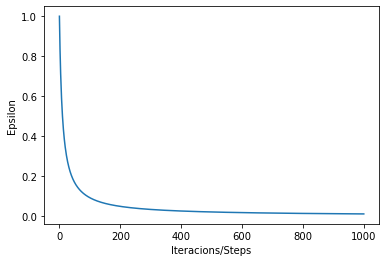

In [3]:
import matplotlib.pyplot as plt

epsilons = []
braços = 10
steps = 1000
for step in range(steps):
    epsilons.append(1 / (1 + step / braços))
plt.plot(epsilons)
plt.ylabel('Epsilon')
plt.xlabel('Iteracions/Steps')
plt.show()

Aquí com ja sabem com calculem el epsilon a cada iteració i sabem que és Beta, podrem graficar fàcilment el decay al llarg de les iteracions. Si ens fixem tenim una gràfica logarítmica on el epsilon cada vegada serà més i més petit a mida que augmentem els steps/iteracions.  Aquí veiem com disminueix epsilon de forma logarítmica, sobretot a les 200 primeres iteracions i després s'estabilitza amb un valor cada vegada més i més a prop de eps=0.

En aquesta gràfica podem veure la comparativa de la nova implementació del epsilon decay amb la aproximació del epsilon-greedy fixat a 0.1. Veiem com focalitza la fase d'exploració al principi del algoritme i un cop troba les decissions òptimes  o les que millor funcionin les explota tot el que pot i cada vegada redueix més i més els events de exploració. Com a conseqüencia veiem una clara millora en la recompensa mitjana.

**8.** Explica amb les teves paraules la gràfica de la comparativa entre `eps_bandit`, `eps_decay_bandit` i `optimistic`. Posa ènfasis en el comportament inicial dels 3 i en el comportament final després de 1.000 iteracions.

100%|██████████| 1000/1000 [00:15<00:00, 63.21it/s]


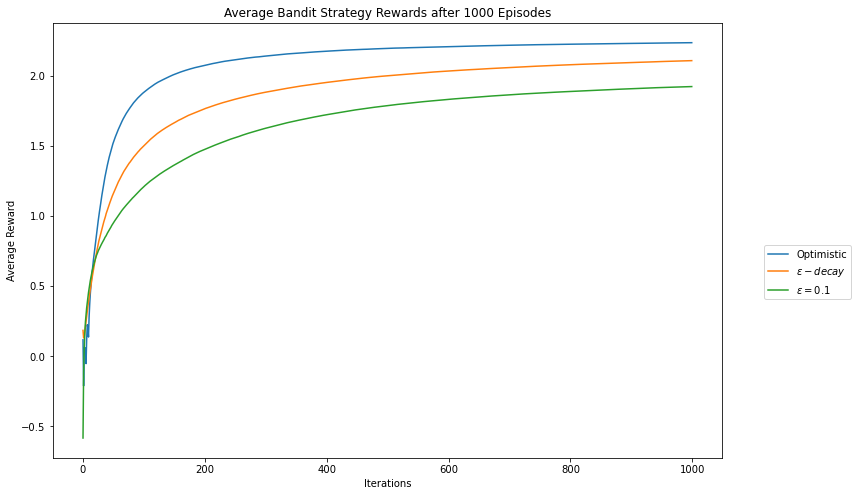

In [15]:
oiv_rewards = np.zeros(iters)
eps_decay_rewards = np.zeros(iters)
eps_1_rewards = np.zeros(iters)

# Select initial values
oiv_init = 5.

#init bandits behaviour
behaviour = eps_bandit(k, 0, iters).mu.copy()

# Run experiments

for i in tqdm.tqdm(range(episodes)):
    # Initialize bandits
    oiv_bandit = eps_bandit(k, 0, iters, behaviour)
    oiv_bandit.k_reward += oiv_init
    oiv_bandit.k_n += 1 #np.ones(k)
    eps_decay = eps_decay_bandit(k, iters, oiv_bandit.mu.copy())
    eps_1 = eps_bandit(k, 0.1, iters, oiv_bandit.mu.copy())

    # Run experiments
    oiv_bandit.run()
    eps_decay.run()
    eps_1.run()

    # Update long-term averages
    oiv_rewards = oiv_rewards + (oiv_bandit.reward - oiv_rewards) / (i + 1)
    eps_decay_rewards = eps_decay_rewards + (eps_decay.reward - eps_decay_rewards) / (i + 1)
    eps_1_rewards = eps_1_rewards + (eps_1.reward - eps_1_rewards) / (i + 1)

plt.figure(figsize=(12,8))
plt.plot(oiv_rewards, label="Optimistic")
plt.plot(eps_decay_rewards, label="$\epsilon-decay$")
plt.plot(eps_1_rewards, label="$\epsilon=0.1$")
plt.legend(bbox_to_anchor=(1.2, 0.5))
plt.xlabel("Iterations")
plt.ylabel("Average Reward")
plt.title("Average Bandit Strategy Rewards after " + str(episodes) + " Episodes")
plt.show()

En aquesta gràfica veiem doncs el rendiment dels tres algoritmes en funció del reward promig. Aquí tenim tres aproximacions diferents, amb la aproximació eps_bandit original el que passa és que un cop comença l'execució del algoritme explorem obtenim un reward més alt que en comparació als altres dos per tenir un algoritme molt més greedy tenint un epsilon de 0.1, per això veiem que a curt termini el algoritme greedy respòn molt millor, però tot això canvia quan fem servir estratègies més intel·ligents i aleshores l'aproximació cada cop es queda més i més enrere a mesura que avancen les iteracions. Mentre que des d'un principi el algoritme greedy epsilon explota molt més que els altres dos el que passa és que els supera pel que fa al average reward, el que passa aquí però és que mentre que aquest guanya més a curt termini que els altres dos, els altres dos estàn aprenent més que el epsilon-greedy i li acabarà passant factura, perquè el epsilon-greedy apren molt poc a poc i ho fa ficant soroll perquè un cop que te unes opcions més òptimes no atura l'exploració i explota el que ha après de forma intel·ligent sinó que continua explorant per sempre amb el mateix ritme, cosa que a mi no em sembla intel·ligent. En canvi, veiem el epsilon-decay que al principi comença amb una aproximació molt menys greedy que el seu pare (epsilon-greedy) però amb una fase d'exploració molt més exhaustiva (comença amb valors epsilon propers a 1) i aleshores a curt termini no te res a fer contra el epsilon-greedy però com veiem, a mida que creix el nombre d'iteracions al epsilon-decay cada cop es fa el epsilon mes i mes petit i comença a centrar-se en explotar aquelles accions òptimes que ha trobat al aprenentatge més exhaustiu que ha fet i d'aquesta forma acaba fent una explotació més intel·ligent que no pas el seu pare i per això cap a la iteració 200 ja començem a veure com el epsilon-greedy perd força i el epsilon-decay comença a marcar distància amb el reward promig del seu pare treient un millor resultat. 
Per una altra banda tenim al tercer algoritme, el optimistic, que el que fa és constantment sobreestimar les recompenses promig i es centra en agafar el màxim d'aquestes sobreestimacions, de forma que el algoritme explora en fases primerenques per maximitzar el reward que fa que informació addicional permeti aquests valors puguin convergir cap a les seves mitjanes reals. Aquesta aproximació té un inconvenient i és que necessites tenir informació sobre el entorn perquè necessitem tenir alguna idea previa de quines recompenses pot tenir cada acció perque es puguin sobreestimar, sino no podem fer res. Aquest algoritme optimista fa servir epsilon=0 i s'ha de passar valors elevats per les estimacions inicials per tal de fer sobreestimacions. Aquesta estratègia no comporta afegir soroll. Aleshores si ens fixem a la gràfica veurem com al principi de l'execució, al llarg de les primeres 50 iteracions més o menys es comporta igual que el epsilon-decay, fa l'exploració en fases inicials començant a maximitzar el reward i un cop els valors promig començen a convergir cap a les mitjanes reals veiem com es desmarca del epsilon-decay obtenint millors resultats que ja comencen a fer-se latents a partir de la iteració 100. Aleshores un cop que finalitzen els 1000 iteracions tenim al optimistic que ha convergit cap a les mitjanes havent obtingut un reward promig bastant bo, el epsilon-decay que ha reduït a minims el epsilon i s'ha dedicat a explotar les accions òptimes que ha trobat fent que el reward promig sigui també acceptable i finalment tenim al epsilon-greedy que segueix explorant al mateix ritme, no ha reduït l'exploració i segueix aplicant-la amb la mateixa probabilitat que al principi de l'execució fent que es perdi oportunitats d'explotació intel·ligent com a l'altre.

# OpenAI Gym

[OpenAI Gym](https://gym.openai.com/) is a toolkit for developing and comparing reinforcement learning algorithms. It makes no assumptions about the structure of your agent, and is compatible with any numerical computation library, such as TensorFlow or Theano.

The gym library is a collection of test problems —[environments](https://gym.openai.com/envs/#classic_control)— that you can use to work out your reinforcement learning algorithms. These environments have a shared interface, allowing you to write general algorithms.

install gym & pyglet

    `pip install gym`
    
    `pip install pyglet`

## Environments

Here’s a bare minimum example of getting something running. This will run an instance of the CartPole-v0 environment for 1000 timesteps, rendering the environment at each step. You should see a window pop up rendering the classic cart-pole problem:


In [1]:
%matplotlib inline
import gym
import tqdm

env = gym.make('CartPole-v0')
env.reset()
for _ in tqdm.tqdm(range(200)):
    env.render()
    env.step(env.action_space.sample()) # take a random action
env.close()

  6%|▌         | 11/200 [00:00<00:04, 38.57it/s]C:\Users\usuario\anaconda3\lib\site-packages\gym\envs\classic_control\cartpole.py:150: UserWarning: WARN: You are calling 'step()' even though this environment has already returned done = True. You should always call 'reset()' once you receive 'done = True' -- any further steps are undefined behavior.
  logger.warn(
100%|██████████| 200/200 [00:01<00:00, 133.51it/s]


Normally, we’ll end the simulation before the cart-pole is allowed to go off-screen. More on that later. For now, please ignore the warning about calling step() even though this environment has already returned `done` = True.



## Observations
If we ever want to do better than take random actions at each step, it’d probably be good to actually know what our actions are doing to the environment.

The environment’s `step` function returns exactly what we need. In fact, `step` returns four values. These are:

* `observation` (object): an environment-specific object representing your observation of the environment. For example, pixel data from a camera, joint angles and joint velocities of a robot, or the board state in a board game.
* `reward` (float): amount of reward achieved by the previous action. The scale varies between environments, but the goal is always to increase your total reward.
* `done` (boolean): whether it’s time to `reset` the environment again. Most (but not all) tasks are divided up into well-defined episodes, and done being True indicates the episode has terminated. (For example, perhaps the pole tipped too far, or you lost your last life.)
* `info` (dict): diagnostic information useful for debugging. It can sometimes be useful for learning (for example, it might contain the raw probabilities behind the environment’s last state change). However, official evaluations of your agent are not allowed to use this for learning.

This is just an implementation of the classic “agent-environment loop”. Each timestep, the agent chooses an `action`, and the environment returns an `observation` and a `reward`.

<img src="https://www.mathworks.com/help/reinforcement-learning/ug/agent_diagram.png" width="50%">



The process gets started by calling `reset()`, which returns an initial `observation`. So a more proper way of writing the previous code would be to respect the `done` flag:


In [3]:
import gym
env = gym.make('CartPole-v0')
for i_episode in range(200):
    observation = env.reset()
    for t in range(10000):
        env.render()
        print(observation)
        action = env.action_space.sample()
        observation, reward, done, info = env.step(action)
        if done:
            print("Episode finished after {} timesteps".format(t+1))
            break
env.close()

[ 0.0199929   0.00123448  0.04705545 -0.04858718]
[ 0.02001759 -0.19452952  0.0460837   0.25856298]
[ 1.6127000e-02 -9.4728624e-05  5.1254962e-02 -1.9235758e-02]
[ 0.01612511 -0.19591284  0.05087024  0.28916803]
[ 0.01220685 -0.3917219   0.0566536   0.5974511 ]
[ 0.00437241 -0.19743656  0.06860263  0.32313788]
[ 4.2368006e-04 -3.9346489e-01  7.5065382e-02  6.3664210e-01]
[-0.00744562 -0.19946565  0.08779822  0.36851117]
[-0.01143493 -0.39571828  0.09516845  0.68753576]
[-0.0193493  -0.5920233   0.10891917  1.0085982 ]
[-0.03118976 -0.78841734  0.12909113  1.3334024 ]
[-0.04695811 -0.9849086   0.15575917  1.6635344 ]
[-0.06665628 -0.79190546  0.18902986  1.4231428 ]
Episode finished after 13 timesteps
[ 0.02372264 -0.04601347 -0.03612038 -0.005325  ]
[ 0.02280237 -0.24059927 -0.03622688  0.27574626]
[ 0.01799038 -0.0449797  -0.03071195 -0.02813895]
[ 0.01709079 -0.23964807 -0.03127473  0.254698  ]
[ 0.01229783 -0.43430984 -0.02618077  0.5373546 ]
[ 0.00361163 -0.23882976 -0.01543368  0.

[-0.13815525 -0.42086014  0.12650472  0.6109265 ]
[-0.14657246 -0.22771218  0.13872325  0.36061305]
[-0.1511267  -0.42450532  0.1459355   0.6936209 ]
[-0.1596168  -0.62131786  0.15980794  1.0284545 ]
[-0.17204316 -0.42864174  0.18037702  0.7899068 ]
[-0.18061599 -0.23639444  0.19617516  0.5589581 ]
[-0.18534388 -0.04448837  0.20735432  0.33392665]
Episode finished after 23 timesteps
[-0.03766884 -0.03290848 -0.04239418 -0.0425682 ]
[-0.03832701 -0.22739768 -0.04324555  0.23644333]
[-0.04287496 -0.03168542 -0.03851668 -0.06956083]
[-0.04350867  0.16396697 -0.0399079  -0.37414283]
[-0.04022933 -0.03056605 -0.04739076 -0.09430546]
[-0.04084065 -0.22497785 -0.04927686  0.18305716]
[-0.04534021 -0.02918671 -0.04561572 -0.12475459]
[-0.04592394  0.16655806 -0.04811081 -0.4314727 ]
[-0.04259278 -0.02785081 -0.05674027 -0.15433593]
[-0.0431498   0.16803572 -0.05982699 -0.46436554]
[-0.03978908  0.3639498  -0.0691143  -0.77528954]
[-0.03251009  0.5599509  -0.08462009 -1.0888927 ]
[-0.02131107  

[ 0.1137936   0.56840193 -0.15328588 -0.81203526]
[ 0.12516163  0.7652539  -0.16952658 -1.1487408 ]
[ 0.1404667  0.9621335 -0.1925014 -1.4894291]
Episode finished after 22 timesteps
[ 0.0397381   0.03680364 -0.0014272  -0.00300834]
[ 0.04047417 -0.15829782 -0.00148736  0.28922394]
[ 0.03730822  0.03684531  0.00429712 -0.0039277 ]
[ 0.03804512 -0.158338    0.00421856  0.2901079 ]
[ 0.03487836 -0.35351986  0.01002072  0.58411837]
[ 0.02780796 -0.54878074  0.02170309  0.879941  ]
[ 0.01683235 -0.7441907   0.03930191  1.1793672 ]
[ 0.00194854 -0.5496005   0.06288925  0.89925903]
[-0.00904347 -0.74551576  0.08087443  1.2110282 ]
[-0.02395379 -0.94158334  0.105095    1.5279194 ]
[-0.04278545 -1.1378045   0.13565339  1.8514683 ]
[-0.06554154 -1.3341331   0.17268275  2.1830158 ]
Episode finished after 12 timesteps
[-0.04348408 -0.00965281 -0.02545772  0.01698408]
[-0.04367713  0.18582481 -0.02511804 -0.2836211 ]
[-0.03996064 -0.00893005 -0.03079046  0.00103511]
[-0.04013924  0.18661964 -0.0307

[-0.02827266 -0.20831902 -0.05105894  0.2932693 ]
[-0.03243905 -0.01250769 -0.04519356 -0.01506973]
[-0.0326892   0.18323228 -0.04549495 -0.32166228]
[-0.02902455 -0.01121327 -0.0519282  -0.04366664]
[-0.02924882  0.18461336 -0.05280153 -0.3522707 ]
[-0.02555655  0.38044485 -0.05984694 -0.66112494]
[-0.01794765  0.5763463  -0.07306945 -0.9720355 ]
[-0.00642073  0.77236867 -0.09251015 -1.2867478 ]
[ 0.00902665  0.9685381  -0.11824511 -1.606903  ]
[ 0.02839741  0.7749961  -0.15038317 -1.3533002 ]
[ 0.04389733  0.97165173 -0.17744917 -1.6890006 ]
Episode finished after 14 timesteps
[-0.0155886  -0.03977281  0.03830807  0.01119882]
[-0.01638405 -0.23542261  0.03853205  0.31571802]
[-0.0210925  -0.43107164  0.04484641  0.62029934]
[-0.02971394 -0.23660375  0.0572524   0.34207124]
[-0.03444601 -0.04234111  0.06409382  0.06797771]
[-0.03529283 -0.23832062  0.06545337  0.38017407]
[-0.04005925 -0.04418623  0.07305685  0.10882559]
[-0.04094297 -0.24027492  0.07523337  0.42363364]
[-0.04574847 -

[-0.02903712  0.5857302   0.09804115 -0.38804507]
[-0.01732252  0.38936326  0.09028025 -0.06613118]
[-0.00953525  0.5830826   0.08895762 -0.32902053]
[ 0.0021264   0.38681436  0.08237721 -0.00966315]
[0.00986269 0.19061354 0.08218395 0.3078316 ]
[0.01367496 0.38447416 0.08834058 0.04215704]
[0.02136444 0.18820378 0.08918373 0.36135292]
[ 0.02512852 -0.00806515  0.09641078  0.6807716 ]
[0.02496721 0.1855949  0.11002621 0.41993138]
[ 0.02867911 -0.01090004  0.11842484  0.74517405]
[ 0.02846111 -0.2074398   0.13332832  1.0726544 ]
[ 0.02431232 -0.40404785  0.1547814   1.4040316 ]
[ 0.01623136 -0.6007158   0.18286204  1.7408311 ]
Episode finished after 32 timesteps
[ 0.0400502  -0.04380921  0.0125048  -0.01269169]
[ 0.03917402 -0.23910823  0.01225097  0.28391027]
[ 0.03439185 -0.04416315  0.01792917 -0.00488373]
[ 0.03350859 -0.23953758  0.0178315   0.29340172]
[ 0.02871784 -0.04467434  0.02369953  0.0063955 ]
[ 0.02782435  0.15009986  0.02382744 -0.27871674]
[ 0.03082635 -0.04535377  0.01

[ 0.00114303 -0.32243314 -0.16817607 -0.27767617]
[-0.00530563 -0.5148066  -0.1737296  -0.04239803]
[-0.01560177 -0.31767428 -0.17457755 -0.38446537]
[-0.02195525 -0.12055938 -0.18226686 -0.726709  ]
[-0.02436644 -0.3127562  -0.19680104 -0.4964795 ]
[-0.03062156 -0.50463825 -0.20673063 -0.27169895]
Episode finished after 32 timesteps
[-0.01391492 -0.02345104 -0.02515941 -0.01356816]
[-0.01438394  0.17202252 -0.02543077 -0.31408182]
[-0.01094349 -0.0227281  -0.03171241 -0.02952616]
[-0.01139805 -0.21738127 -0.03230293  0.25298488]
[-0.01574568 -0.02181331 -0.02724324 -0.04970942]
[-0.01618194 -0.21653424 -0.02823742  0.23425508]
[-0.02051263 -0.4112416  -0.02355232  0.517899  ]
[-0.02873746 -0.21579608 -0.01319434  0.21788828]
[-0.03305338 -0.41072696 -0.00883658  0.50638014]
[-0.04126792 -0.60572326  0.00129102  0.79626524]
[-0.05338239 -0.41061908  0.01721633  0.50398874]
[-0.06159477 -0.6059794   0.02729611  0.80204713]
[-0.07371435 -0.8014648   0.04333705  1.1031901 ]
[-0.08974365 -

[ 0.00275859 -0.42225033 -0.02153992  0.54578596]
[-0.00568641 -0.6170631  -0.0106242   0.83160514]
[-0.01802767 -0.81203824  0.0060079   1.1209279 ]
[-0.03426844 -1.0072385   0.02842646  1.4154893 ]
[-0.05441321 -0.81248     0.05673625  1.1318257 ]
[-0.07066281 -1.0082968   0.07937276  1.44175   ]
[-0.09082875 -0.81423694  0.10820776  1.1748877 ]
[-0.10711349 -0.62067455  0.13170552  0.91799325]
[-0.11952697 -0.8173075   0.15006538  1.2489978 ]
[-0.13587312 -1.0140002   0.17504534  1.5846748 ]
[-0.15615313 -1.2107184   0.20673883  1.9264438 ]
Episode finished after 23 timesteps
[ 0.03147896 -0.0019672   0.03394801 -0.02533043]
[ 0.03143962 -0.19755913  0.0334414   0.27786723]
[ 0.02748844 -0.3931418   0.03899875  0.58090717]
[ 0.0196256  -0.19858739  0.05061689  0.30076015]
[ 0.01565385 -0.00422206  0.05663209  0.02446057]
[ 0.01556941  0.19004393  0.0571213  -0.24983032]
[ 0.01937029 -0.00584525  0.0521247   0.06030875]
[ 0.01925338  0.18849209  0.05333087 -0.21548364]
[ 0.02302323  

Episode finished after 20 timesteps
[-0.02710832 -0.00702643 -0.0395193  -0.00522402]
[-0.02724885 -0.20155999 -0.03962378  0.27473283]
[-0.03128004 -0.39609486 -0.03412912  0.5546597 ]
[-0.03920194 -0.20051073 -0.02303593  0.25142238]
[-0.04321216 -0.39529628 -0.01800748  0.5367512 ]
[-0.05111808 -0.19992582 -0.00727246  0.23844916]
[-0.0551166  -0.00470074 -0.00250347 -0.05651881]
[-0.05521061 -0.19978671 -0.00363385  0.2353732 ]
[-0.05920635 -0.00461303  0.00107361 -0.05845374]
[-5.9298608e-02  1.9049351e-01 -9.5461852e-05 -3.5079774e-01]
[-0.05548874  0.3856168  -0.00711142 -0.64351076]
[-0.0477764   0.58083713 -0.01998163 -0.9384246 ]
[-0.03615966  0.7762227  -0.03875012 -1.2373186 ]
[-0.0206352   0.58161944 -0.0634965  -0.9570226 ]
[-0.00900282  0.3874062  -0.08263695 -0.6849452 ]
[-0.00125469  0.19352289 -0.09633585 -0.41938028]
[ 2.6157666e-03 -1.1141879e-04 -1.0472346e-01 -1.5855452e-01]
[ 0.00261354  0.19634183 -0.10789455 -0.48235244]
[ 0.00654037  0.39280802 -0.1175416  -0.

[0.06789663 0.21195145 0.05491158 0.04145049]
[0.07213566 0.01608683 0.05574058 0.3509405 ]
[ 0.0724574  -0.17978169  0.06275939  0.6606662 ]
[0.06886177 0.01441338 0.07597272 0.38838622]
[0.06915004 0.20837937 0.08374044 0.120591  ]
[ 0.07331762  0.40220794  0.08615226 -0.1445421 ]
[0.08136178 0.2059646  0.08326142 0.17402859]
[0.08548107 0.00975582 0.08674199 0.49177277]
[ 0.08567619 -0.1864757   0.09657745  0.8104836 ]
[0.08194668 0.00719982 0.11278712 0.54967374]
[0.08209067 0.20057186 0.12378059 0.29454777]
[0.08610211 0.00392258 0.12967154 0.62356347]
[0.08618056 0.19701844 0.14214282 0.3743681 ]
[9.0120926e-02 1.9369830e-04 1.4963017e-01 7.0827705e-01]
[0.0901248  0.19296113 0.16379572 0.4661841 ]
[ 0.09398402 -0.00405022  0.17311941  0.80568665]
[ 0.09390302 -0.2010688   0.18923314  1.1474403 ]
Episode finished after 34 timesteps
[-0.02927942  0.03116536  0.00517291 -0.00887137]
[-0.02865612 -0.16403039  0.00499548  0.28543916]
[-0.03193672 -0.35922325  0.01070426  0.57969344]


[ 0.02431799 -0.00246437 -0.00971432 -0.02498488]
[ 0.0242687   0.19279553 -0.01021401 -0.3207169 ]
[ 0.02812461  0.38806143 -0.01662835 -0.6166033 ]
[ 0.03588584  0.1931757  -0.02896042 -0.32920364]
[ 0.03974935  0.38869768 -0.03554449 -0.63087684]
[ 0.04752331  0.5842971  -0.04816203 -0.9345385 ]
[ 0.05920925  0.7800345  -0.0668528  -1.2419583 ]
[ 0.07480994  0.97594786 -0.09169196 -1.554812  ]
[ 0.0943289   0.78203654 -0.12278821 -1.2920865 ]
[ 0.10996962  0.5886707  -0.14862993 -1.0402306 ]
[ 0.12174304  0.39580217 -0.16943455 -0.7976539 ]
[ 0.12965909  0.5927933  -0.18538763 -1.1384851 ]
[ 0.14151494  0.4005145  -0.20815733 -0.90920126]
Episode finished after 43 timesteps
[-0.02681301  0.0235512   0.00491694 -0.01196139]
[-0.02634198  0.2186023   0.00467771 -0.3030889 ]
[-0.02196994  0.02341399 -0.00138406 -0.00893442]
[-0.02150166 -0.17168808 -0.00156275  0.2833115 ]
[-0.02493542  0.02345612  0.00410348 -0.00986391]
[-0.0244663   0.21851899  0.0039062  -0.30124933]
[-0.02009592  

[-0.05060288 -0.24100229  0.03974209  0.32423285]
[-0.05542292 -0.4366669   0.04622674  0.6291791 ]
[-0.06415626 -0.6324025   0.05881033  0.93605465]
[-0.07680431 -0.43812084  0.07753142  0.66241634]
[-0.08556673 -0.63423103  0.09077974  0.9784693 ]
[-0.09825135 -0.4404357   0.11034913  0.7156259 ]
[-0.10706006 -0.24700014  0.12466165  0.4596142 ]
[-0.11200006 -0.4436434   0.13385393  0.7888457 ]
[-0.12087294 -0.64032483  0.14963084  1.1204646 ]
[-0.13367943 -0.44744796  0.17204013  0.8782095 ]
[-0.14262839 -0.64443755  0.18960433  1.2196625 ]
Episode finished after 20 timesteps
[0.02740155 0.04010927 0.03005158 0.00925694]
[ 0.02820373 -0.15543048  0.03023672  0.31126797]
[ 0.02509512 -0.35096988  0.03646208  0.61333126]
[ 0.01807573 -0.15637593  0.04872871  0.3323518 ]
[ 0.01494821 -0.35215637  0.05537574  0.63999444]
[ 0.00790508 -0.54800487  0.06817563  0.949589  ]
[-0.00305502 -0.3538636   0.08716741  0.67908174]
[-0.01013229 -0.16005376  0.10074905  0.4150655 ]
[-0.01333337 -0.35

[-0.02153825 -0.41598094  0.01315071  0.59113413]
[-0.02985787 -0.22104554  0.0249734   0.3026225 ]
[-0.03427878 -0.41651434  0.03102585  0.6030757 ]
[-0.04260907 -0.22183977  0.04308736  0.3203245 ]
[-0.04704586 -0.417548    0.04949385  0.62627816]
[-0.05539683 -0.61332464  0.06201942  0.93412876]
[-0.06766332 -0.41909167  0.08070199  0.6615615 ]
[-0.07604515 -0.6152383   0.09393322  0.97852445]
[-0.08834992 -0.42149267  0.11350371  0.716763  ]
[-0.09677977 -0.6179873   0.12783897  1.0429069 ]
[-0.10913952 -0.42477334  0.14869711  0.7929333 ]
[-0.11763498 -0.62158954  0.16455577  1.1284559 ]
[-0.13006677 -0.81843907  0.1871249   1.4679027 ]
Episode finished after 17 timesteps
[ 0.00590767  0.02513031  0.03288797 -0.03727561]
[ 0.00641028  0.21976559  0.03214245 -0.31940332]
[ 0.01080559  0.41441536  0.02575439 -0.6017789 ]
[ 0.0190939   0.60916775  0.01371881 -0.8862397 ]
[ 0.03127725  0.41386232 -0.00400599 -0.5892759 ]
[ 0.0395545   0.60904014 -0.0157915  -0.883218  ]
[ 0.0517353   

[ 0.06747182  0.4455745  -0.11417149 -0.80658865]
[ 0.07638331  0.2521871  -0.13030326 -0.55188966]
[ 0.08142705  0.4488751  -0.14134106 -0.8826214 ]
[ 0.09040456  0.2559264  -0.15899348 -0.6375005 ]
[ 0.09552308  0.06333689 -0.1717435  -0.39880732]
[ 0.09678982  0.26042604 -0.17971964 -0.7403365 ]
[ 0.10199834  0.06818027 -0.19452637 -0.50916594]
[ 0.10336194  0.26543397 -0.2047097  -0.8562967 ]
Episode finished after 24 timesteps
[ 0.04595419 -0.0169081  -0.00226099  0.02530609]
[ 0.04561603  0.1782462  -0.00175487 -0.26808935]
[ 0.04918095  0.37339315 -0.00711666 -0.56132525]
[ 0.05664882  0.56861424 -0.01834316 -0.85624176]
[ 0.0680211  0.373747  -0.035468  -0.5693826]
[ 0.07549604  0.569348   -0.04685565 -0.87302494]
[ 0.086883    0.7650747  -0.06431615 -1.1800634 ]
[ 0.10218449  0.9609699  -0.08791742 -1.4921945 ]
[ 0.1214039   1.1570449  -0.11776131 -1.8109856 ]
[ 0.1445448   0.9634159  -0.15398102 -1.5570955 ]
[ 0.16381311  0.7704369  -0.18512292 -1.3161436 ]
Episode finished a

[ 0.02803272  0.15358528  0.0065282  -0.308325  ]
[ 0.03110442 -0.04162908  0.0003617  -0.01359043]
[ 3.0271841e-02 -2.3675622e-01  8.9887566e-05  2.7920660e-01]
[ 0.02553672 -0.43187946  0.00567402  0.5719179 ]
[ 0.01689913 -0.6270805   0.01711238  0.8663829 ]
[ 0.00435752 -0.43219557  0.03444003  0.5791291 ]
[-0.00428639 -0.6277828   0.04602262  0.88245934]
[-0.01684205 -0.8234986   0.0636718   1.1892481 ]
[-0.03331202 -1.0193855   0.08745676  1.5011897 ]
[-0.05369973 -1.2154537   0.11748056  1.8198477 ]
[-0.07800881 -1.4116691   0.15387751  2.146602  ]
[-0.10624219 -1.6079369   0.19680955  2.4825866 ]
Episode finished after 15 timesteps
[-0.04839409 -0.00470378  0.01138517 -0.02763757]
[-0.04848816  0.19025306  0.01083242 -0.31670672]
[-0.0446831  -0.00502149  0.00449829 -0.02062739]
[-0.04478353 -0.20020767  0.00408574  0.2734714 ]
[-0.04878768 -0.39538768  0.00955517  0.56744015]
[-0.05669544 -0.59064233  0.02090397  0.863118  ]
[-0.06850828 -0.39581114  0.03816633  0.57708037]
[-

[-0.01700617 -0.42534423  0.031003    0.66144395]
[-0.02551305 -0.23066707  0.04423188  0.37868196]
[-0.03012639 -0.03620028  0.05180552  0.10026702]
[-0.0308504  -0.23202494  0.05381086  0.40883395]
[-0.0354909  -0.4278669   0.06198753  0.71798444]
[-0.04404824 -0.6237894   0.07634722  1.0295165 ]
[-0.05652403 -0.42976186  0.09693755  0.7617472 ]
[-0.06511926 -0.626076    0.1121725   1.0832909 ]
[-0.07764078 -0.43259853  0.13383831  0.82780826]
[-0.08629275 -0.6292716   0.15039448  1.1594107 ]
[-0.09887818 -0.8259984   0.1735827   1.4952195 ]
[-0.11539815 -0.63335997  0.20348708  1.2613816 ]
Episode finished after 18 timesteps
[ 0.01354614  0.01986725 -0.03779087  0.00485429]
[ 0.01394348  0.21551023 -0.03769379 -0.2995085 ]
[ 0.01825369  0.41114864 -0.04368396 -0.603837  ]
[ 0.02647666  0.6068534  -0.0557607  -0.9099532 ]
[ 0.03861373  0.8026839  -0.07395976 -1.2196275 ]
[ 0.05466741  0.60858905 -0.09835231 -0.9510055 ]
[ 0.06683919  0.80488735 -0.11737242 -1.2728989 ]
[ 0.08293694  

[ 0.0087969  -0.42658916 -0.04365838  0.5130759 ]
[ 2.6511439e-04 -6.2106991e-01 -3.3396866e-02  7.9168755e-01]
[-0.01215628 -0.4255057  -0.01756311  0.48868796]
[-0.0206664  -0.23014043 -0.00778936  0.19052196]
[-0.02526921 -0.03490792 -0.00397892 -0.10460798]
[-0.02596737  0.16027083 -0.00607108 -0.39854357]
[-0.02276195  0.35547838 -0.01404195 -0.69313437]
[-0.01565238  0.160554   -0.02790464 -0.40490487]
[-0.0124413  -0.03416133 -0.03600273 -0.12114847]
[-0.01312453 -0.22874945 -0.0384257   0.15996207]
[-0.01769952 -0.03309906 -0.03522646 -0.14459127]
[-0.0183615  -0.22769928 -0.03811828  0.13677354]
[-0.02291548 -0.03205267 -0.03538281 -0.16768725]
[-0.02355654  0.16355741 -0.03873656 -0.4713191 ]
[-0.02028539 -0.0309966  -0.04816294 -0.19109271]
[-0.02090532 -0.22539763 -0.0519848   0.08601626]
[-0.02541327 -0.02957055 -0.05026447 -0.2226042 ]
[-0.02600468  0.16623245 -0.05471655 -0.53070927]
[-0.02268003 -0.02807884 -0.06533074 -0.25575718]
[-0.02324161  0.1679121  -0.07044589 -

[ 0.10491201  0.01968609 -0.16776888 -0.44374982]
[ 0.10530574 -0.17271423 -0.17664388 -0.20829433]
[ 0.10185146  0.02443577 -0.18080977 -0.55108124]
[ 0.10234017 -0.1677478  -0.1918314  -0.32037413]
[ 0.09898521  0.02951454 -0.19823888 -0.6668931 ]
Episode finished after 41 timesteps
[-0.04493996 -0.02620411  0.03668742  0.01217917]
[-0.04546404 -0.22183248  0.036931    0.31620795]
[-0.04990069 -0.41746047  0.04325515  0.6203051 ]
[-0.0582499  -0.613159    0.05566126  0.92629135]
[-0.07051308 -0.80898666  0.07418709  1.2359339 ]
[-0.08669282 -0.6148923   0.09890576  0.96738416]
[-0.09899066 -0.8111933   0.11825345  1.2894275 ]
[-0.11521453 -1.007604    0.144042    1.6166716 ]
[-0.1353666  -1.204101    0.17637542  1.9505666 ]
Episode finished after 9 timesteps
[-0.04539009  0.01718544 -0.03182862  0.02585744]
[-0.04504638 -0.17746595 -0.03131147  0.3083306 ]
[-0.0485957  -0.37212807 -0.02514486  0.5909766 ]
[-0.05603826 -0.5668891  -0.01332533  0.875634  ]
[-0.06737605 -0.3715886   0.0

[ 0.1285491  -0.32232067 -0.1026671   0.1306951 ]
[ 0.12210269 -0.51583356 -0.1000532   0.38930482]
[ 0.11178602 -0.7094036  -0.0922671   0.6488412 ]
[ 0.09759794 -0.9031273  -0.07929028  0.9111027 ]
[ 0.07953539 -1.097092   -0.06106822  1.1778487 ]
[ 0.05759356 -1.2913699  -0.03751125  1.4507796 ]
[ 0.03176616 -1.4860114  -0.00849566  1.7315106 ]
[ 0.00204593 -1.6810354   0.02613455  2.0215383 ]
[-0.03157478 -1.876418    0.06656532  2.3221948 ]
[-0.06910314 -2.0720785   0.11300921  2.6345913 ]
[-0.11054471 -2.2678616   0.16570105  2.9595468 ]
Episode finished after 45 timesteps
[-0.01691573 -0.0085236  -0.00373588 -0.02772636]
[-0.0170862   0.18665172 -0.0042904  -0.32158566]
[-0.01335317  0.3818345  -0.01072212 -0.6156185 ]
[-0.00571648  0.18686399 -0.02303449 -0.3263318 ]
[-0.0019792  -0.00792256 -0.02956112 -0.04100101]
[-0.00213765 -0.2026084  -0.03038114  0.24221048]
[-0.00618982 -0.00706596 -0.02553693 -0.05989853]
[-0.00633114  0.18841265 -0.0267349  -0.3605279 ]
[-0.00256288  

[-0.03384518 -0.4161739   0.01845518  0.5311711 ]
[-0.04216866 -0.6115505   0.0290786   0.8296116 ]
[-0.05439967 -0.4168379   0.04567083  0.54621404]
[-0.06273643 -0.22238639  0.05659511  0.2682635 ]
[-0.06718416 -0.02811588  0.06196038 -0.00604564]
[-0.06774648 -0.22406918  0.06183947  0.30552498]
[-0.07222786 -0.02988048  0.06794997  0.03296792]
[-0.07282547  0.16420457  0.06860933 -0.2375259 ]
[-0.06954138 -0.03182707  0.06385881  0.07598508]
[-0.07017792 -0.2278036   0.06537851  0.38811243]
[-0.07473399 -0.4237897   0.07314076  0.7006711 ]
[-0.08320978 -0.6198453   0.08715418  1.0154524 ]
[-0.09560669 -0.4259868   0.10746323  0.75135934]
[-0.10412642 -0.23249799  0.12249041  0.49433374]
[-0.10877638 -0.03929713  0.13237709  0.24262601]
[-0.10956233  0.15370998  0.1372296  -0.00554641]
[-0.10648813  0.3466243   0.13711868 -0.2519785 ]
[-0.09955564  0.53954905  0.13207911 -0.4984627 ]
[-0.08876466  0.7325857   0.12210986 -0.74677724]
[-0.07411294  0.53600955  0.10717431 -0.4182975 ]


[-0.02435048 -0.19209692  0.01399449  0.25055385]
[-0.02819241 -0.3874159   0.01900557  0.54761785]
[-0.03594073 -0.5827996   0.02995793  0.8462278 ]
[-0.04759672 -0.3880989   0.04688248  0.5631141 ]
[-0.0553587  -0.5838463   0.05814477  0.870191  ]
[-0.06703563 -0.7797089   0.07554859  1.1805733 ]
[-0.08262981 -0.9757259   0.09916005  1.4959502 ]
[-0.10214432 -0.78193957  0.12907906  1.235804  ]
[-0.11778311 -0.97846216  0.15379514  1.5659795 ]
[-0.13735236 -0.7854761   0.18511473  1.324955  ]
Episode finished after 11 timesteps
[ 0.02064369  0.02385454 -0.03695566 -0.0450244 ]
[ 0.02112078 -0.17071852 -0.03785615  0.23577344]
[ 0.01770641  0.02492326 -0.03314068 -0.06860603]
[ 0.01820488 -0.16970827 -0.0345128   0.21343938]
[ 0.01481071  0.02588968 -0.03024401 -0.08992758]
[ 0.0153285   0.22143179 -0.03204257 -0.39199698]
[ 0.01975714  0.41699347 -0.0398825  -0.69460785]
[ 0.02809701  0.61264527 -0.05377466 -0.9995745 ]
[ 0.04034991  0.41828173 -0.07376615 -0.72425276]
[ 0.04871555  

[-0.09025422 -0.98417485  0.10636615  1.3312052 ]
[-0.10993772 -1.1804653   0.13299026  1.6551896 ]
[-0.13354702 -1.376865    0.16609405  1.9861718 ]
[-0.16108432 -1.1838313   0.20581748  1.7492135 ]
Episode finished after 27 timesteps
[-0.04944311  0.04694744 -0.0071973  -0.00239123]
[-0.04850416 -0.14807056 -0.00724512  0.2880122 ]
[-0.05146557 -0.34308845 -0.00148488  0.5784013 ]
[-0.05832734 -0.14794572  0.01008315  0.285251  ]
[-0.06128626  0.04703099  0.01578817 -0.00423481]
[-0.06034563 -0.14831379  0.01570347  0.29338735]
[-0.06331191 -0.34365606  0.02157122  0.5909813 ]
[-0.07018504 -0.5390733   0.03339085  0.8903804 ]
[-0.08096649 -0.73463196  0.05119845  1.19337   ]
[-0.09565914 -0.5402092   0.07506585  0.91716367]
[-0.10646332 -0.7362614   0.09340913  1.2324625 ]
[-0.12118855 -0.54245645  0.11805838  0.97044474]
[-0.13203768 -0.3491      0.13746728  0.7170575 ]
[-0.13901968 -0.54582965  0.15180843  1.0496564 ]
[-0.14993627 -0.35301164  0.17280155  0.80821615]
[-0.1569965  -

[-0.0114883   0.15923433 -0.0076156  -0.24249214]
[-0.00830361 -0.03577801 -0.01246544  0.04777893]
[-0.00901917 -0.23071902 -0.01150986  0.33650297]
[-0.01363355 -0.4256753  -0.0047798   0.62553424]
[-0.02214706 -0.6207302   0.00773088  0.91670793]
[-0.03456166 -0.8159558   0.02606504  1.2118105 ]
[-0.05088078 -1.0114044   0.05030125  1.512546  ]
[-0.07110887 -1.2070981   0.08055218  1.8204976 ]
[-0.09525083 -1.0129582   0.11696213  1.5538888 ]
[-0.11550999 -0.81941634  0.1480399   1.299868  ]
[-0.13189831 -1.0160743   0.17403726  1.6349933 ]
[-0.1522198  -1.212759    0.20673713  1.9764726 ]
Episode finished after 17 timesteps
[ 0.02260438 -0.02926481  0.01683836 -0.02286662]
[ 0.02201909 -0.22462414  0.01638103  0.27508107]
[ 0.0175266  -0.41997594  0.02188265  0.5728853 ]
[ 0.00912709 -0.61539775  0.03334036  0.8723808 ]
[-0.00318087 -0.81095684  0.05078797  1.1753567 ]
[-0.01940001 -0.6165303   0.07429511  0.8990181 ]
[-0.03173061 -0.81257623  0.09227547  1.2140985 ]
[-0.04798214 -

[ 0.06634218  0.19336991 -0.07364295 -0.35528344]
[ 0.07020959 -0.00063193 -0.08074862 -0.0867009 ]
[ 0.07019694  0.19554906 -0.08248264 -0.40372783]
[ 0.07410792  0.39173803 -0.0905572  -0.7212332 ]
[ 0.08194268  0.58798826 -0.10498185 -1.0409899 ]
[ 0.09370245  0.39440563 -0.12580165 -0.7830225 ]
[ 0.10159057  0.20121638 -0.1414621  -0.5324169 ]
[ 0.10561489  0.0083378  -0.15211044 -0.28744033]
[ 0.10578164  0.20526469 -0.15785925 -0.6239681 ]
[ 0.10988694  0.01265783 -0.17033862 -0.38486823]
[ 0.1101401  -0.17968827 -0.17803597 -0.15036245]
[ 0.10654633  0.01747699 -0.18104322 -0.49350205]
[ 0.10689587 -0.17469181 -0.19091326 -0.26289636]
[ 0.10340203  0.02256955 -0.1961712  -0.6092006 ]
[ 0.10385343 -0.1693477  -0.2083552  -0.3841513 ]
Episode finished after 32 timesteps
[-0.00892475  0.04979901 -0.03813834  0.00360559]
[-0.00792877  0.24544658 -0.03806623 -0.3008623 ]
[-0.00301984  0.44108984 -0.04408347 -0.60530335]
[ 0.00580196  0.63679963 -0.05618954 -0.9115392 ]
[ 0.01853795  

[-0.02256247  0.15271258 -0.00363388 -0.32718575]
[-0.01950822 -0.04235745 -0.0101776  -0.035651  ]
[-0.02035537  0.15290897 -0.01089062 -0.33152762]
[-0.01729719 -0.04205629 -0.01752117 -0.04229885]
[-0.01813831 -0.23692267 -0.01836715  0.24480489]
[-0.02287677 -0.43177754 -0.01347105  0.53163826]
[-0.03151232 -0.23646872 -0.00283829  0.23474124]
[-0.03624169 -0.43155     0.00185654  0.5265275 ]
[-0.04487269 -0.23645422  0.01238709  0.23443018]
[-0.04960178 -0.04151142  0.01707569 -0.05431987]
[-0.050432  -0.236874   0.0159893  0.2437013]
[-0.05516949 -0.04198404  0.02086332 -0.04389563]
[-0.05600917  0.15283263  0.01998541 -0.32992366]
[-0.05295251 -0.04256804  0.01338694 -0.03100588]
[-0.05380388 -0.23787938  0.01276682  0.26587054]
[-0.05856146 -0.04294195  0.01808423 -0.02275845]
[-0.0594203   0.15191604  0.01762906 -0.30968118]
[-0.05638198  0.34678245  0.01143544 -0.5967527 ]
[-0.04944633  0.15150236 -0.00049962 -0.30048975]
[-0.04641628  0.3466314  -0.00650941 -0.5933302 ]
[-0.

## Spaces

In the examples above, we’ve been sampling random actions from the environment’s action space. But what actually are those actions? Every environment comes with an `action_space` and an `observation_space`. These attributes are of type `Space`, and they describe the format of valid actions and observations:

In [4]:
import gym
env = gym.make('CartPole-v0')
print(env.action_space)
#> Discrete(2)
print(env.observation_space)
#> Box(4,)

Discrete(2)
Box([-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38], [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38], (4,), float32)


The `Discrete` space allows a fixed range of non-negative numbers, so in this case valid `actions` are either 0 or 1. The `Box` space represents an n-dimensional box, so valid `observations` will be an array of 4 numbers. We can also check the `Box`’s bounds:

In [5]:
print(list(env.observation_space.high))
print(list(env.observation_space.low))

[4.8, 3.4028235e+38, 0.41887903, 3.4028235e+38]
[-4.8, -3.4028235e+38, -0.41887903, -3.4028235e+38]


This introspection can be helpful to write generic code that works for many different environments. `Box` and `Discrete` are the most common `Spaces`. You can sample from a Space or check that something belongs to it:



In [70]:
from gym import spaces
space = spaces.Discrete(8) # Set with 8 elements {0, 1, 2, ..., 7}
x = space.sample()
assert space.contains(x)
assert space.n == 8


For `CartPole-v0` one of the actions applies force to the left, and one of them applies force to the right. (Can you figure out which is which?)

Fortunately, the better your learning algorithm, the less you’ll have to try to interpret these numbers yourself.



**CartPole-v1 is considered "solved" when the agent obtains an average reward of at least 475.0 over 100 consecutive episodes**

## MonteCarlo Implementation for CartPole

In [79]:
import gym
from random import randint
import math
import tqdm
import numpy as np
import matplotlib.pyplot as plt

L_decay = []
# L_history = []
def learn(episodeCount, episodeVerbose=100):
    tqdm_episodes = tqdm.tqdm(range(episodeCount))
    for i_episode in tqdm_episodes:  # Start an episode
        obs = env.reset()
        env._max_episode_steps = 1000
        # Compute the decay of the exploration
        decayX = 0.02
        decayY = 20
        decay = max(-i_episode*decayX+decayY, 10/(i_episode+1))
        L_decay.append(decay)
        
        iter_verbose = i_episode % episodeVerbose == 0 if episodeVerbose > -1 else 0
        doEpisodeMC(obs, decay, i_episode, verbose=iter_verbose)
        i = max(i_episode-100, 0)
        tqdm_episodes.set_postfix({"last_100_avg_pole_upright": np.mean(stepsHistory[i:i_episode+1]),
                                  "len(history)": len(history)})


def doEpisodeMC(obs, decay, i_episode, verbose=False):
    # Reset reward count and states/actions for this episode
    episodeStatesActions = []
    totalRewards = 0

    for t in range(env.spec.max_episode_steps):
        
        if verbose:
            env.render()
            
        state = getState(obs)  # Get the state
        action = policy(state, decay)  # Get the action
        
        # Save state and action to episodeStatesActions
        episodeStatesActions.append({'state': state, 'action': action})  

        obs, reward, done, _ = env.step(action)  # Apply the action
        
        totalRewards += reward  # Update total reward for this episode
        if done:  # Episode is over
            break

    stepsHistory[i_episode] = t
    for i, state_action in enumerate(episodeStatesActions):  # Update value for chosen actions
        updatePolicyMC(state_action['state'], 
                        state_action['action'], 
                        totalRewards-i)
                        
    if verbose:
        print({"Episode {}. Iteration with pole upright: {}. History length: {}".format(i_episode, t+1, len(history))})



# @param state <string> the state to update
# @param action <int> the action to update
# @param G <int> the reward
def updatePolicyMC(state, action, G):
    a = history[state][action]
    a['count'] += 1
    a['value'] = a['value'] + (G - a['value'])/ a['count']


# @param obs <[float]> the observation to convert into a state
# @return the state associated to the observation_space
# If the set of observations where never met, create the state
# The function reduces the number of possible states
def getState(obs):
    state = ''
    for o in obs:
#         state += str(math.floor(o))
#         state += str(o)
        state += str(round(o,1))
    return state


# @param state <string>
# @param decay <int>
# @return an action
# The policy progressivly stops exploration and gets greedy
def policy(state, decay):
    # Get the less explored action and the most valued action
    maxValueAction = env.action_space.sample()
    minCountAction = env.action_space.sample()
    if state not in history:  # If state does not exists, create it
        history[state] = []
        for _ in range(env.action_space.n):
            history[state].append({'count':0, 'value':0})
    stateValues = history[state]
    for action in range(env.action_space.n):
        if stateValues[maxValueAction]['value'] < stateValues[action]['value']:
            maxValueAction = action
        if stateValues[minCountAction]['count'] > stateValues[action]['count']:
            minCountAction = action
    # Computing the decay of the exploration
    if randint(0, 100) < decay:
        return minCountAction
    else:
        return maxValueAction

gym.envs.register(
    id="CartPole-v2",
    entry_point="gym.envs.classic_control:CartPoleEnv",
    max_episode_steps=1000,
    reward_threshold=950.0,
)
env = gym.make('CartPole-v1')
#env = gym.make('CartPole-v2')
nbEpisodes = 2000
nVerboseEpisodes = 1000
stepsHistory = [0]*nbEpisodes

history = {}  # 'state' ==> [{'count': int, 'value': float}]

learn(nbEpisodes, nVerboseEpisodes)
env.close()


C:\Users\usuario\anaconda3\lib\site-packages\gym\envs\registration.py:216: UserWarning: WARN: Overriding environment CartPole-v2
  logger.warn("Overriding environment {}".format(id))
  4%|▎         | 74/2000 [00:00<00:05, 340.52it/s, last_100_avg_pole_upright=30.1, len(history)=1272]

{'Episode 0. Iteration with pole upright: 23. History length: 18'}


 51%|█████     | 1014/2000 [00:04<00:15, 64.12it/s, last_100_avg_pole_upright=195, len(history)=6824] 

{'Episode 1000. Iteration with pole upright: 80. History length: 6714'}


100%|██████████| 2000/2000 [00:12<00:00, 165.09it/s, last_100_avg_pole_upright=212, len(history)=9759]


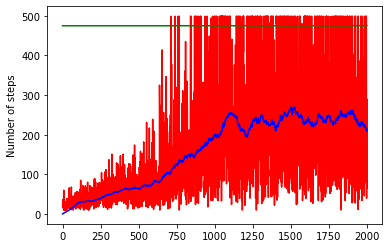

In [80]:
plt.plot(range(nbEpisodes), stepsHistory, 'r',
         range(nbEpisodes), (np.convolve(stepsHistory, np.ones(100), 'full') / 100)[:nbEpisodes], 'b',
         range(nbEpisodes), [env.spec.reward_threshold]*nbEpisodes,'g')
plt.ylabel('Number of steps')
plt.show()

In [82]:

L_history.append(history)
len(L_history)

3

#### Preguntes

**1.** Explica què és el `episodeCount` i el `env.spec.max_episode_steps`.

**2.** Com són les observacions de l'entorn? En quin estat s'inicialitza l'environment?

**3.** Explica el `decay` utilitzat. Mostra la gràfica del decay utilitzat per totes les epoques.

**4.** Explica la funció `action = policy(state, decay)`. 

**5.** Què passa en el `obs, reward, done, _ = env.step(action)`. Explica les variables retornades.

**6.** Com es premien els rewards en l'actualització de la policy `updatePolicyMC`? Què es guarda al diccionari `history`?

**7.** Explica la darrere gràfica retornada. Què s'hi representa?

**8.** Explica la relació entre la mida del `history`, i el que s'obté de la funció `getState(obs)`. Fés proves reduint o augmentant la dimensionalitat i el número de possibles estats del sistema per veure com afecta al aprenentatge.



#### Respostes

**1.** Explica què és el `episodeCount` i el `env.spec.max_episode_steps`.

El episodeCount serà el nombre de episodis que farà el nostre cartpole, osigui el nombre d'experiments que s'hauràn de prendre per moure el objecte cap a la dreta o cap a l'esquerra. El nombre de moviments que volem "simular".
El env.spec.max_episode_steps és el nombre d'iteracions màximes que es faràn per episodi, osigui les accions, per provar diferents policies fins trobar una que ens satisfagui el nostre episodi i llavors acabarem amb aquell episodi perquè es farà un break i no continuarem iterant. És el numero de decisions o accions que s'han pres al llarg d'un episodi. 

**2.** Com són les observacions de l'entorn? En quin estat s'inicialitza l'environment?

Les observacions del entorn venen definides per arrays de quatre nombres que són diferents dades que aporten informació sobre el nostre entorn, cadascún d'aquests nombres del array són [posició del cart, velocitat, angle del pal, proporció de rotació del pal].
El environment s'inicialitza amb un estat en el que totes les observacions que hem descrit tenen assignat un valor aleatori uniforme entre -0.05 i 0.05.

**3.** Explica el `decay` utilitzat. Mostra la gràfica del decay utilitzat per totes les epoques.

El decay utilitzat aquí s'actualitza a cada episodi. Defineix dos decay's, un que anomena X i un altre que anomena Y que entenc que és el màxim decay, el incial, que els fixa a 0.02 i 20 respectivament. El decay que fa servir després és el màxim entre el producte negatiu del episodi "i" pel decayX sumat al decayY i el quocient de 10 entre el numero d'episodi més 1. Aleshores aquest decay l'actualitza al llarg dels diferents episodis, fent-lo cada cop més petit fins que s'estabilitza entorn al 0.

Realment aquí el tipus de decay que implementa aquest algoritme és un decay que disminueix al llarg dels episodis en una taxa de decay fixa de 0.02. Aleshores a mida que anem fent episodis el que fem és multiplicar el nostre epsilon per 0.99, de forma que disminuim 0.02 unitats de epsilon a cada episodi, fent que al llarg dels episodis ens apropem més i més cap a una estratègia més greedy. Al principi doncs tenim un epsilon alt perquè estem fent una estratègia de exploració per aprendre més sobre l'entorn ja que nosaltres com agents no sabem ben bé amb quin tipus d'entorn estem tractant, un cop tenim la informació que necessitem com per interactuar amb l'entorn de forma òptima ja podrem explotar aquest coneixement. Per aquest motiu és fàcil veure per què necessitem que el epsilon del nostre algoritme disminueixi al llarg de la vida d'aquest agent perquè pugui aprendre i després actuar de forma òptima. Aleshores per aquest factor multiplicatiu (penalitzador) de 0.99 al llarg dels episodis veiem com fem cada cop més i més petit al nostre epsilon. El decay bàsicament és això, la disminució o reducció del epsilon al llarg de la vida de l'agent. En el nostre cas veiem com al episodi 1000 el epsilon ja s'estabilitza i no baixa mes.

Text(0.5, 1.0, 'Decay del algoritme CartPole')

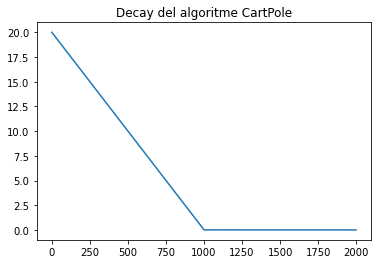

In [13]:
plt.plot(range(nbEpisodes), L_decay)
plt.title("Decay del algoritme CartPole")

**4.** Explica la funció `action = policy(state, decay)`. 

Aquesta funció policy el que fa és, rebent un estat determinat i un decay concret, agafa dues mostres aleatories d'accions del nostre entorn i mira si el estat que hem passat a la funció existeix (estat d'una observació concreta) al diccionari history, si no existeix el crea i inicialitza una llista com a valor afegint diccionaris per contar diferents valors. Per les diferents accions el que fa és actualitzar les accions menys explorades i les accions més valorades de forma que va comparant amb les mostres que ha agafat anteriorment i compara amb les diferents accions del nostre entorn, tant pel valor com pel comptador. Un cop ha fet això genera un nombre entre 0 i 100 i si aquest és més petit que el decay ens retorna l'acció menys explorada i si és més gran que el decay ens retorna l'acció més valorada que ha agafat després de comparar totes les mostres amb les accions que tenim al nostre entorn. 

**5.** Què passa en el `obs, reward, done, _ = env.step(action)`. Explica les variables retornades.


Aquí bàsicament executem el step, que això vol dir aplicar l'acció que s'ha decidit previament perquè l'executi l'agent, el agent executa aquesta acció en el entorn (environment) que estem tractant com per exemple moure el cotxe/cart cap a la dreta a una velocitat determinada. Un cop s'executa aquesta acció obtenim el nou estat del agent i del entorn com per exemple seria la nova posició del cart i el nou angle del pal. Es comprova tot seguit si l'episodi ha acabat, tant perque el objectiu s'hagi complert com per que hagi fallat tantes vegades que no es pugui recuperar. Un cop hem arribat fins aquí el que fem és computar tot això obtenint el reward del que hem fet, i el entorn ens donarà quatre variables que són:  

obs: ens dona informació sobre el estat del agent, basats en les especificacions del entorn amb el que treballem.
reward: com hem dit, la sortida del que s'ha fet, la recompensa de l'acció que s'ha pres. El procés per calcular el reward es defineix al entorn.
done: aquesta variable ens diu si el pas ha finalitzat o no, podem considerar que hagi finalitzat en cas de que es compleixi una condició determinada, aquestes condicions es defineixen a dintre del entorn també. 

**6.** Com es premien els rewards en l'actualització de la policy `updatePolicyMC`? Què es guarda al diccionari `history`?


Agafa la llista d'accions per un estat i acció concrets i el que fa és accedir al value de 'count' per incrementar-lo i actualitza el valor com la suma del valor que tenim desat mes el quocient de la diferència del reward que nosaltres especifiquem amb el paràmetre G i el valor desat del value entre el count que tot just hem incrementat. 


Al diccionari history el que guardem són llistes del nombre de vegades que s'ha pres una determinada acció amb el reward corresponent per cadascun dels estats que hem anat tenint. Aquests rewards els anirem actualitzant com hem descrit abans. Aleshores aquí després diferenciem accions menys explorades i accions més valorades, que al llarg de l'execució del algoritme el policy anirà fent servir i a cada cop s'anirà fent més i més greedy tirant més dels més valorats.

**7.** Explica la darrere gràfica retornada. Què s'hi representa?

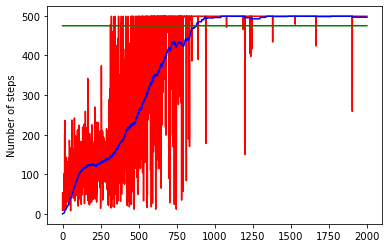

In [14]:
plt.plot(range(nbEpisodes), stepsHistory, 'r',
         range(nbEpisodes), (np.convolve(stepsHistory, np.ones(100), 'full') / 100)[:nbEpisodes], 'b',
         range(nbEpisodes), [env.spec.reward_threshold]*nbEpisodes,'g')
plt.ylabel('Number of steps')
plt.show()

En aquesta gràfica crec que el que hi podem veure és el nombre d'accions o steps que s'han fet al llarg de cadascun dels episodis (eix de les X). Veiem també la línia de color blau que dibuixa la convolució de les accions que s'han pres pels 2000 episodis que veiem al gràfic. Si ens fixem podem veure com creixen continuament en els primers 800 episodis el nombre d'accions preses per cada episodi, fins aquest punt el algoritme ha estat constantment aprenent per poder arribar a tenir un bon reward, després s'estabilitza. Finalment també tenim una línia horitzontal de color verd que ens indica quin és el threshold o reward mínim com per considerar un episodi satisfactori. Aquest experiment el que busca és tenir 100 episodis com a mínim per sobre d'aquest threshold. 

**8.** Explica la relació entre la mida del `history`, i el que s'obté de la funció `getState(obs)`. Fés proves reduint o augmentant la dimensionalitat i el número de possibles estats del sistema per veure com afecta al aprenentatge.

La relació de la mida del history i el que obtenim en la funció getState és bàsicament que la funció getState ens converteix una observació, representada per un valor en punt flotant a un string, ens arrodoneix les xifres per sota i ens retorna el string resultant. Aquest string serà doncs la key representant un estat concret d'una llista de diccionaris on desarem diferents accions (amb les vegades que l'hem pres i el darrer reward que s'ha obtingut). Si no fessim l'arrodoniment de l'observació el diccionari history passaria a tenir una mida enorme perquè gairebé mai tindriem la mateixa observació i aleshores sempre crearia un nou estat que comportaria crear una nova key al diccionari history. Aleshores al fer el arrodoniment reduïm bastant el nombre de possibles estats fent així que la mida del diccionari sigui més petita i que el cas en el que les observacions mai es donin siguin més esporàdiques. 

Tot seguit mirem el que passa si no arrodonim les xifres per passar el nostre nombre a string:

Simplement el que he fet és comentar la línia de la funció getState i ficar el mateix sense cridar la funció floor de la llibreria math per arrodonir les xifres.

Mida del diccionari history sense arrodonir les xifres per sota: 44554

Mida del diccionari history arrodonint les xifres per sota: 191


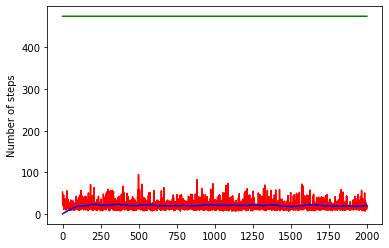

In [53]:
print("Mida del diccionari history sense arrodonir les xifres per sota: "+str(len(L_history[0].keys())))
print()
print("Mida del diccionari history arrodonint les xifres per sota: "+str(len(L_history[1].keys())))
plt.plot(range(nbEpisodes), stepsHistory, 'r',
         range(nbEpisodes), (np.convolve(stepsHistory, np.ones(100), 'full') / 100)[:nbEpisodes], 'b',
         range(nbEpisodes), [env.spec.reward_threshold]*nbEpisodes,'g')
plt.ylabel('Number of steps')
plt.show()

Veiem també aquí la gràfica que resulta si no arrodonim el nombre, bàsicament el que veiem aquí és que mai s'arriba a aprendre, no podem aprendre perquè constantment tindrem nous estats, serà molt complicat coincidir en estats perquè estarem tractant amb coincidències amb nombres flotants que no és gaire comú. El nombre d'estats aquí serà enorme. Aleshores sempre estarem explotant i no podrem millorar mai el nombre d'accions, no millorarem gairebé mai el reward...

Si en comptes de no arrodonir, arrodonim al primer decimal (fent un round(x,1) per exemple) disminuirem força el nombre d'estats tot i que continuaran sent bastant alts. Mirem com ens quedaria la mida del diccionari i la gràfica dels steps al llarg dels episodes:

Mida del diccionari history arrodonint les xifres al primer decimal: 9759


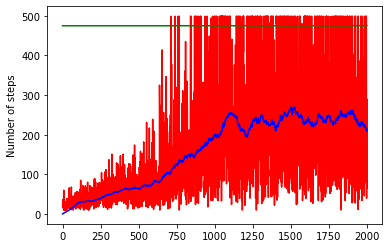

In [83]:
print("Mida del diccionari history arrodonint les xifres al primer decimal: "+str(len(L_history[2].keys())))
plt.plot(range(nbEpisodes), stepsHistory, 'r',
         range(nbEpisodes), (np.convolve(stepsHistory, np.ones(100), 'full') / 100)[:nbEpisodes], 'b',
         range(nbEpisodes), [env.spec.reward_threshold]*nbEpisodes,'g')
plt.ylabel('Number of steps')
plt.show()

Aquí al arrodonir al primer decimal ja reduïm a una quarta part el espai de possibles estats i veiem com la corba de steps per episode ja s'aixeca bastant més, tot i que és lluny dels resultats que volem. Aquí tenim 9759 keys al diccionari, a diferència de les 44554 que obtenim sense arrodonir, o de les 191 arrodonint a la unitat per sota. Llavors aquí ja podem veure un cert aprenentatge, al llarg dels episodes a cada cop es fan més steps tot i que sembla estabilitzar-se sobre els 200-250 steps a partir del episode 1100 més o menys.